In [1]:
# Import library

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from mlxtend.classifier import StackingCVClassifier


In [2]:
# conda install -c conda-forge xlrd

In [3]:
# Read data

credit_data = pd.read_excel(r'default of credit card clients.xls')

credit_data


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
credit_data['default'].value_counts() 

# Unbalance data 
# 1 is default
# 0 is non default

0    23364
1     6636
Name: default, dtype: int64

In [5]:
credit_data.describe(include = 'all')

# There is no null
# There are 3 categoric variables
# Less unique


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [6]:
credit_data.dtypes

# objects -> SEX, EDUCATION, MARRIAGE

ID            int64
LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [7]:
# Duplicate check

credit_data.duplicated().sum()

# If there is a duplicate, delete it

credit_data.drop_duplicates(inplace = True)


In [8]:
# Drop unnecessary columns -> ID

credit_data.drop('ID', axis = 1, inplace = True)

credit_data


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,male,high school,married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
# Copy data for Tree Base and CatBoost Categoric

credit_data_tree_base = credit_data.copy()

credit_data_tree_base

credit_data_categoric = credit_data.copy()

credit_data_categoric


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,male,high school,married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
# Check nulls 

credit_data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [11]:
# If there is null, fill null
# Mean for non objects
# Mode for objects

for rec in credit_data.columns:
    if credit_data[rec].dtypes != object:
        credit_data[rec].fillna(value = credit_data[rec].mean(), inplace = True)
    else:
        credit_data[rec].fillna(value = credit_data[rec].mode()[0], inplace = True)


credit_data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

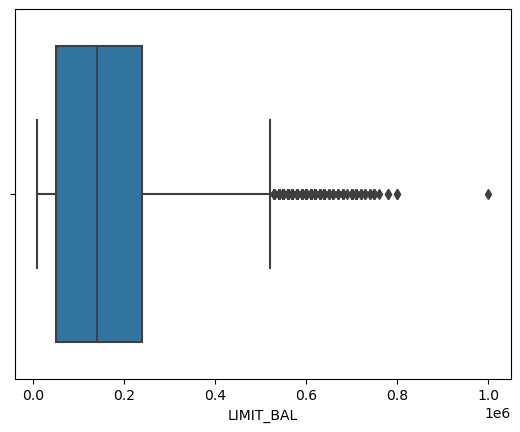

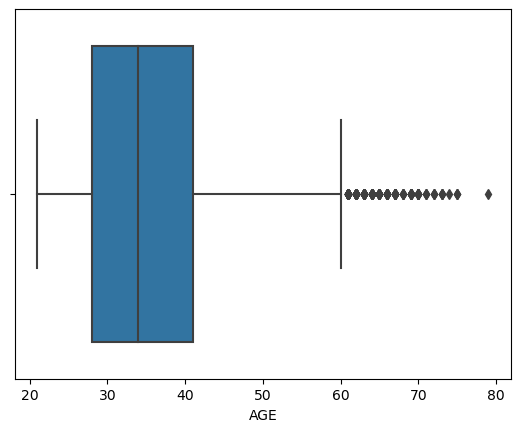

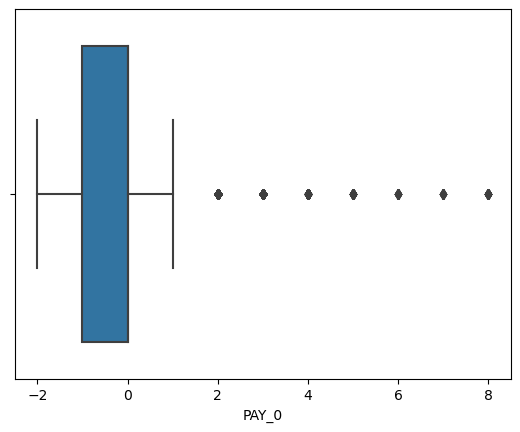

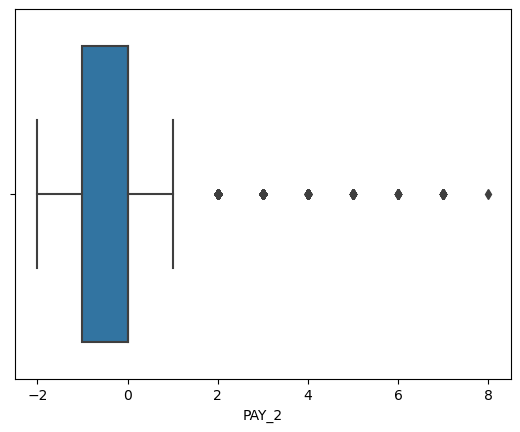

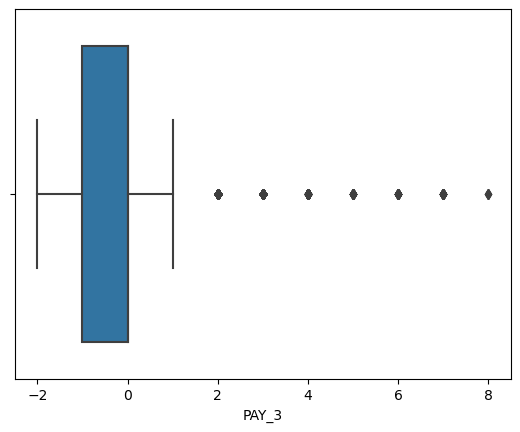

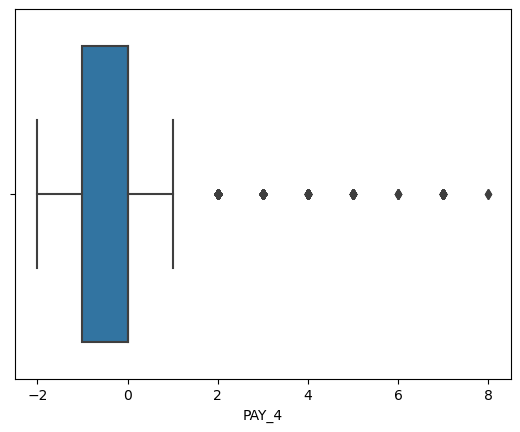

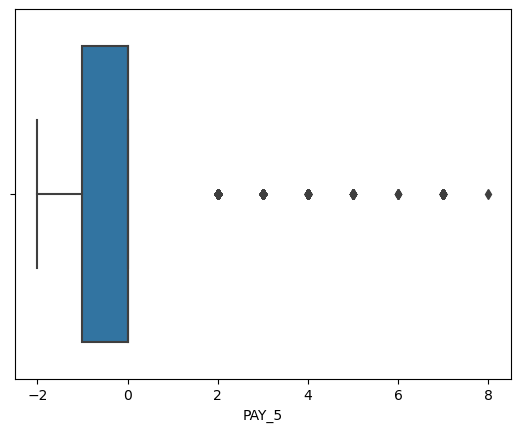

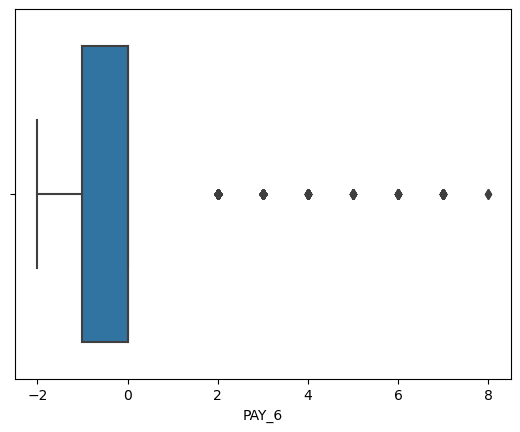

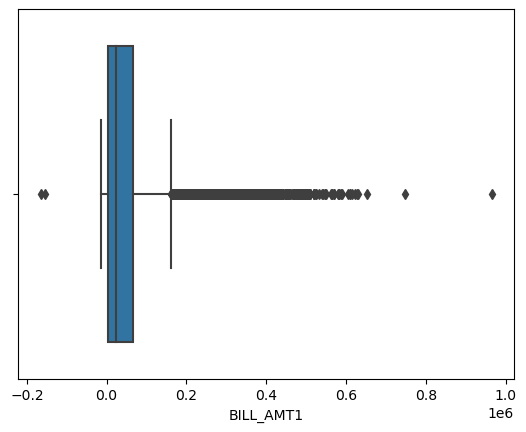

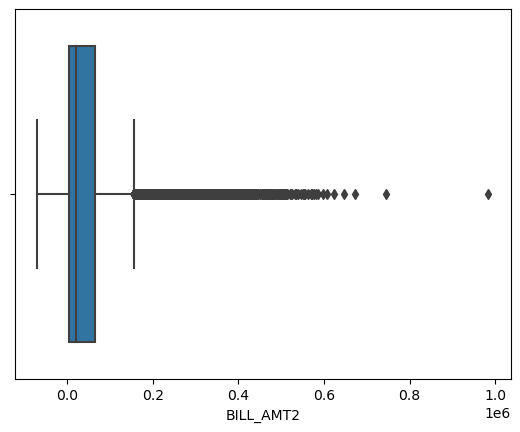

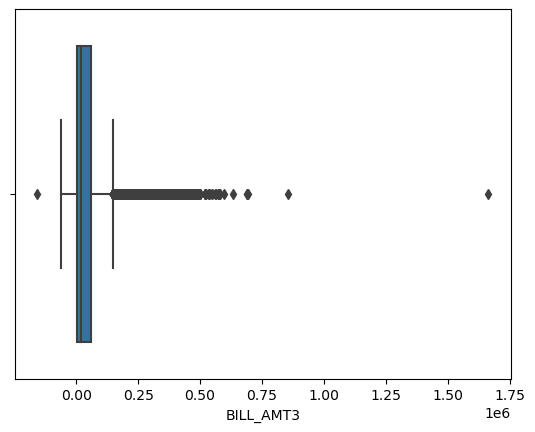

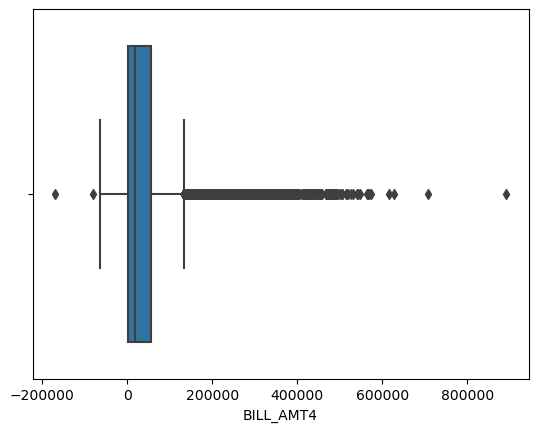

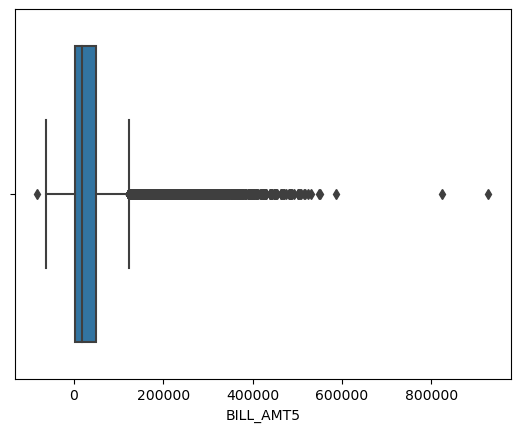

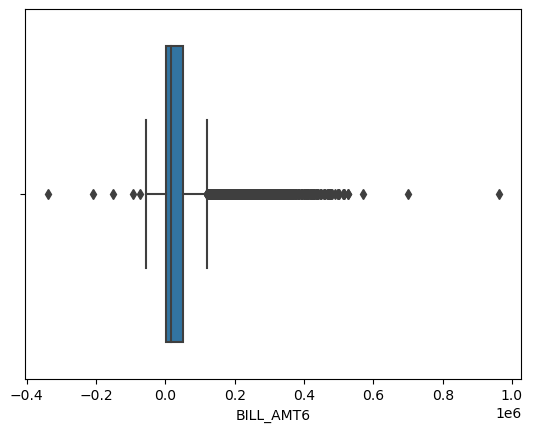

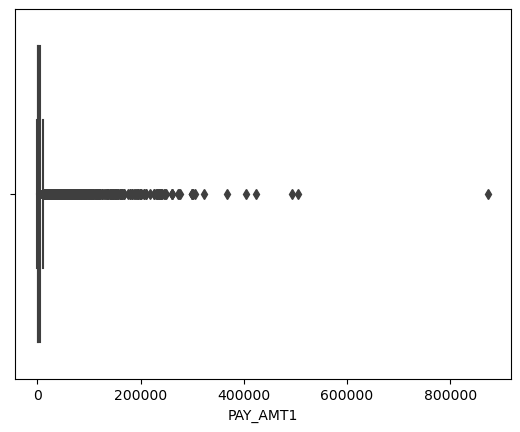

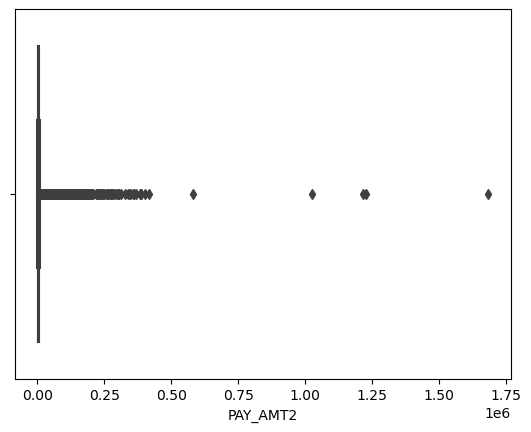

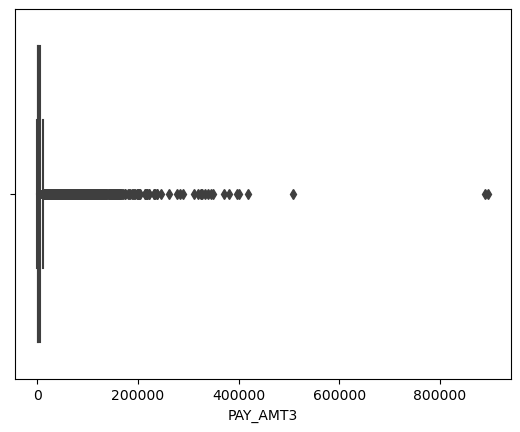

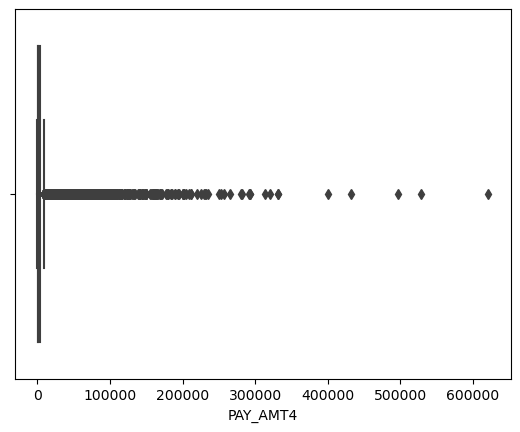

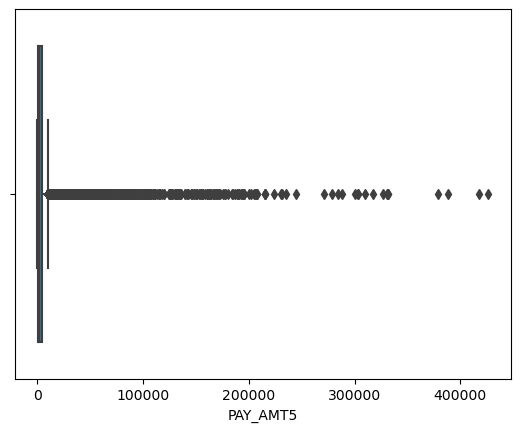

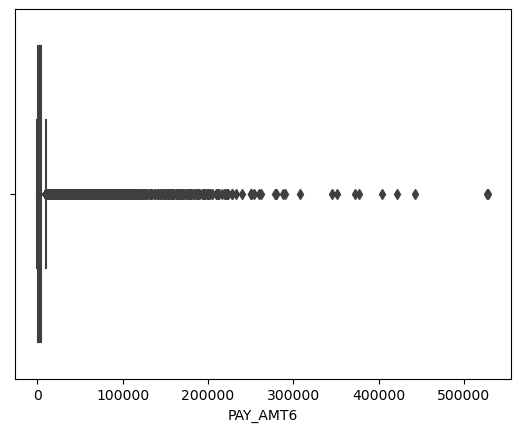

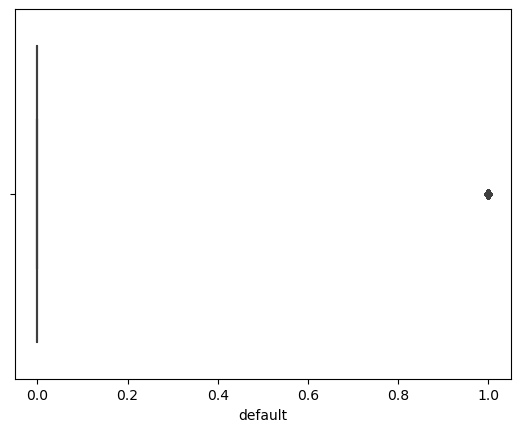

In [12]:
# outlier treatment for Logistic Regression

for rec in credit_data.columns:
    if credit_data[rec].dtypes != object:
        sns.boxplot(x = credit_data[rec], data = credit_data)
        plt.show()

In [13]:
# outlier treatment for Logistic Regression

for rec in credit_data.columns:
    if credit_data[rec].dtype != object and rec != 'default':
        q1 = credit_data[rec].quantile(0.25)
        q3 = credit_data[rec].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        credit_data[rec] = np.where(credit_data[rec] > upper,
                                    upper,
                                     np.where(credit_data[rec] < lower,
                                              lower,
                                              credit_data[rec]))


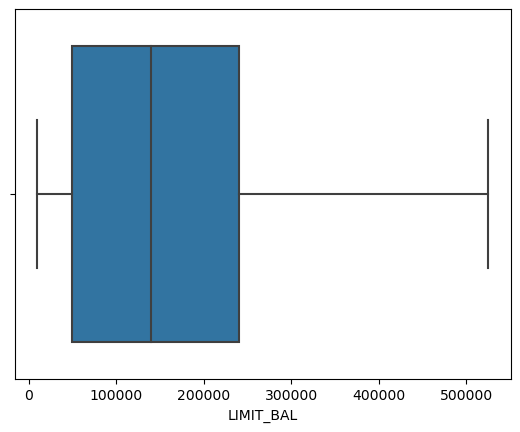

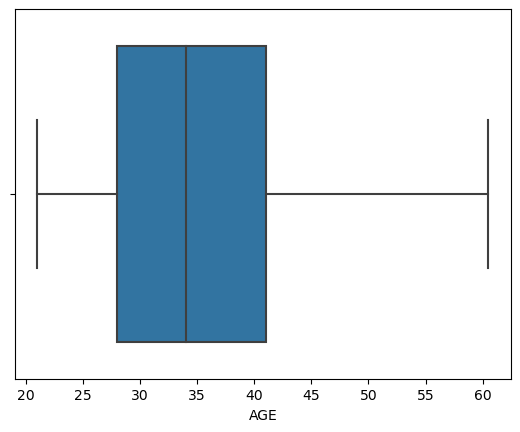

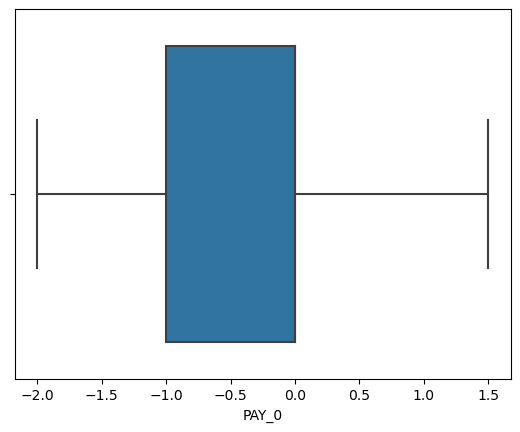

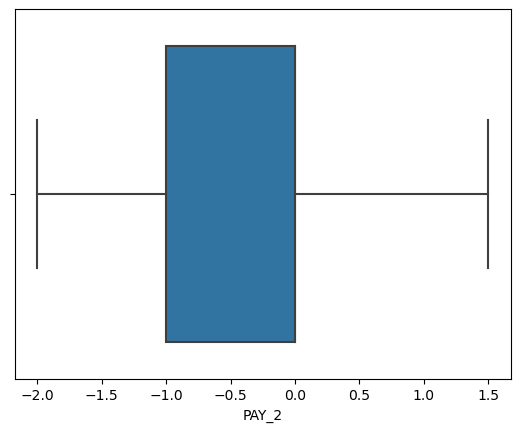

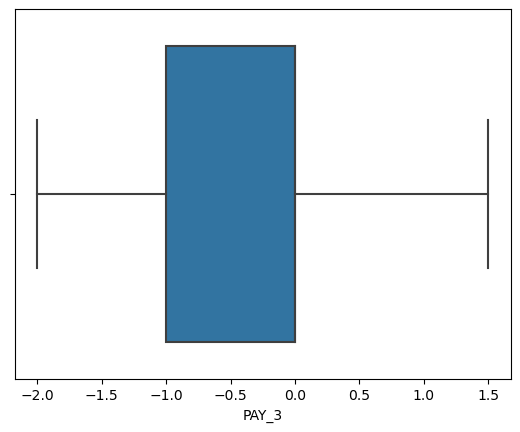

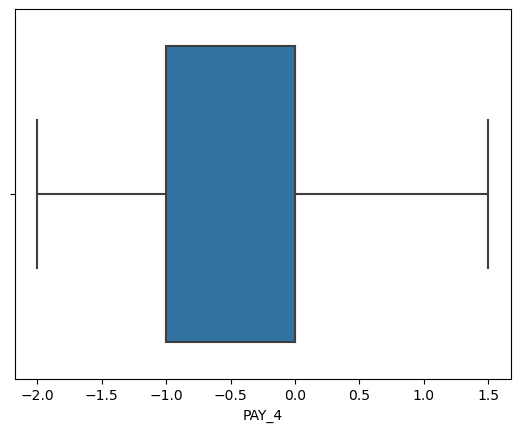

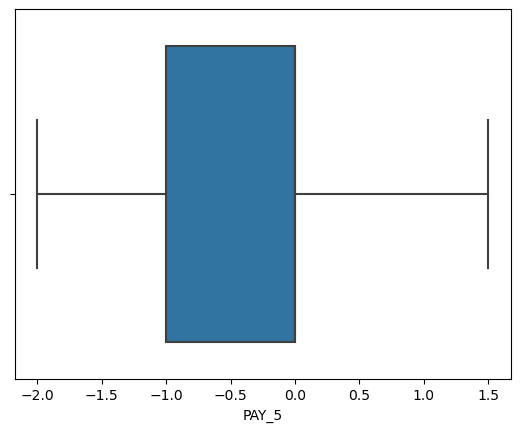

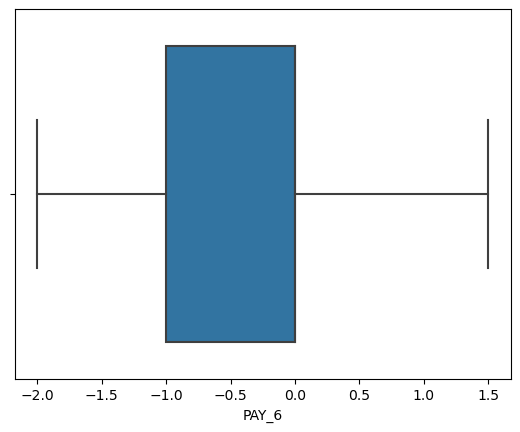

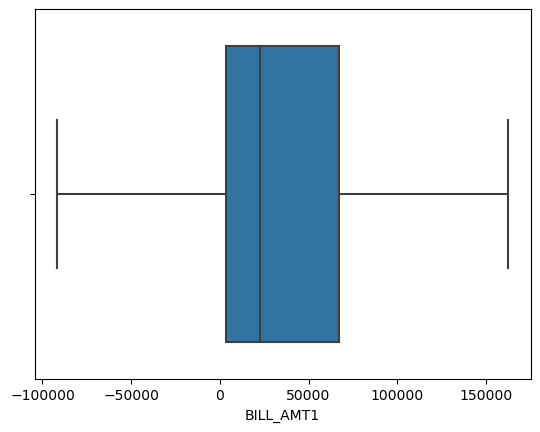

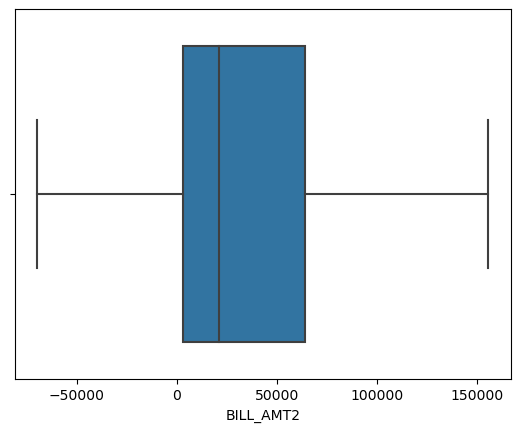

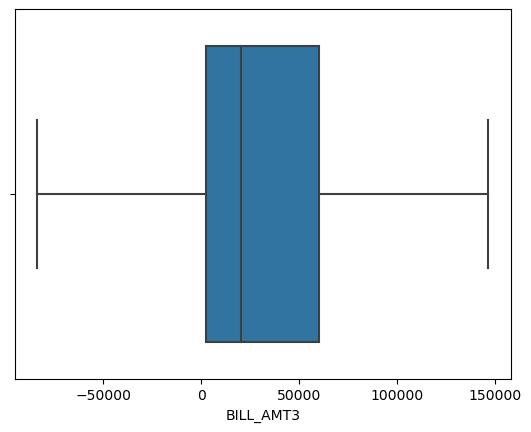

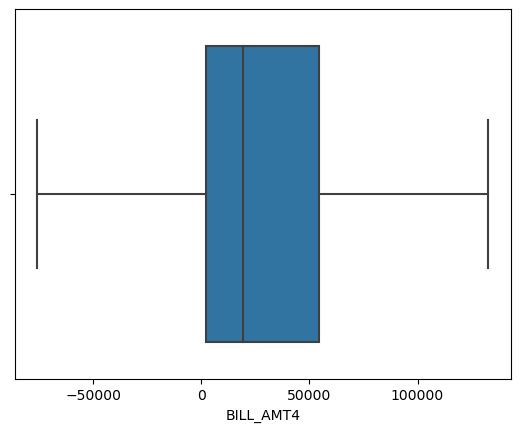

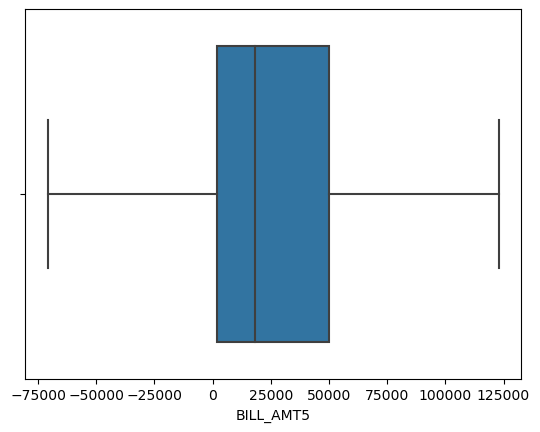

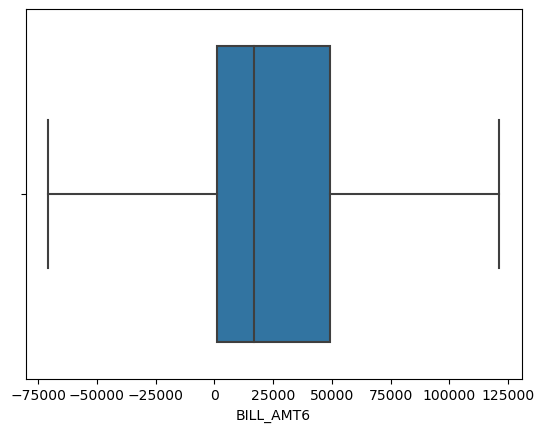

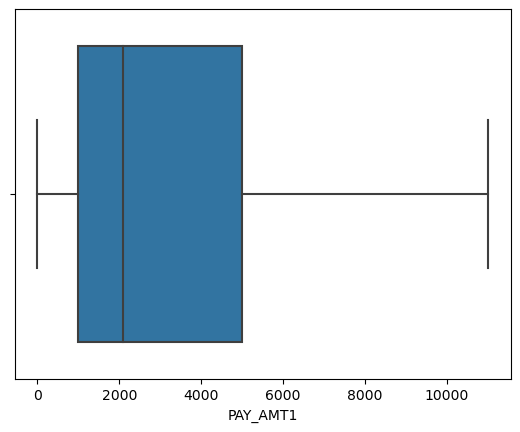

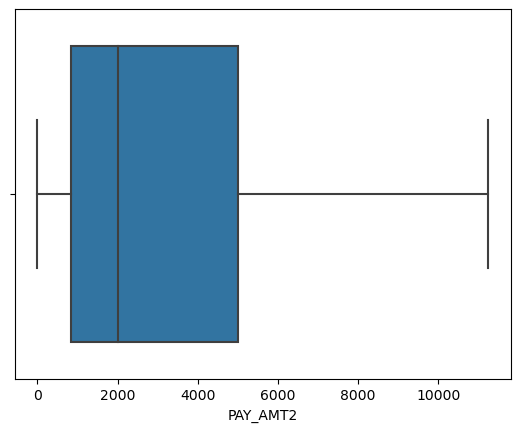

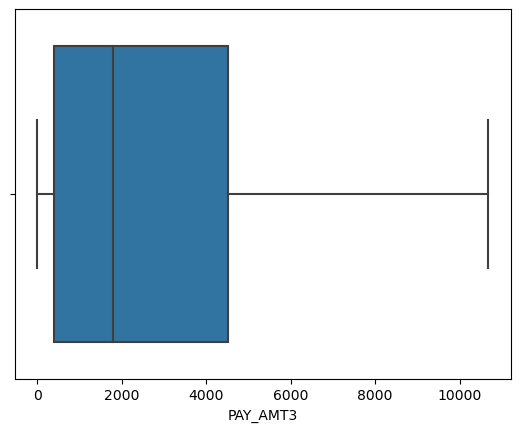

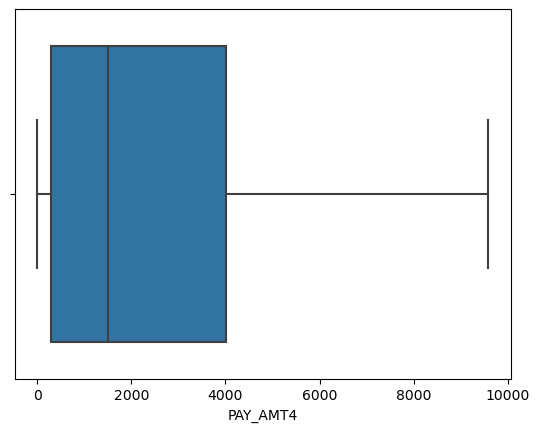

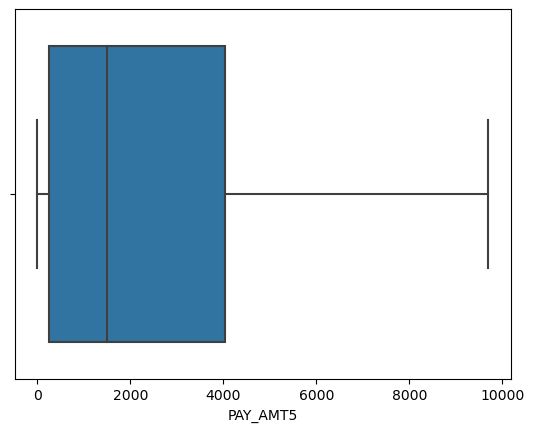

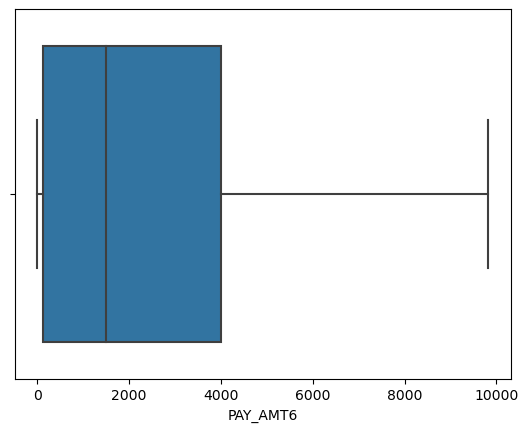

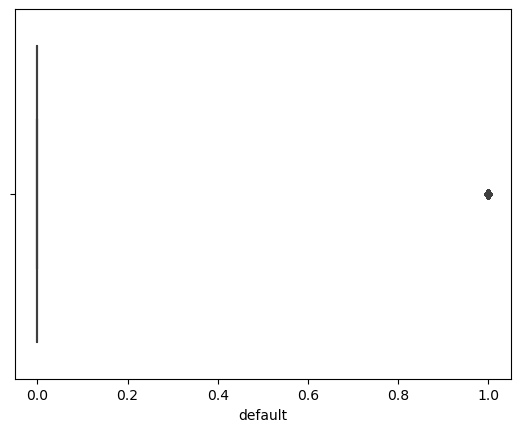

In [14]:
# outlier treatment for Logistic Regression

for rec in credit_data.columns:
    if credit_data[rec].dtypes != object:
        sns.boxplot(x = credit_data[rec], data = credit_data)
        plt.show()

In [15]:
from scipy import stats

for i in credit_data.columns:
    
    if credit_data[i].dtype in ['int64', 'float64']:

        kstest_statistic, kstest_p_value = stats.kstest(credit_data[i], 'norm')
        
        print(f'Column: {i}')
        
        if kstest_p_value > 0.05:
            print('Data is normally distributed')
        else:
            print('Data is not normally distributed')


Column: LIMIT_BAL
Data is not normally distributed
Column: AGE
Data is not normally distributed
Column: PAY_0
Data is not normally distributed
Column: PAY_2
Data is not normally distributed
Column: PAY_3
Data is not normally distributed
Column: PAY_4
Data is not normally distributed
Column: PAY_5
Data is not normally distributed
Column: PAY_6
Data is not normally distributed
Column: BILL_AMT1
Data is not normally distributed
Column: BILL_AMT2
Data is not normally distributed
Column: BILL_AMT3
Data is not normally distributed
Column: BILL_AMT4
Data is not normally distributed
Column: BILL_AMT5
Data is not normally distributed
Column: BILL_AMT6
Data is not normally distributed
Column: PAY_AMT1
Data is not normally distributed
Column: PAY_AMT2
Data is not normally distributed
Column: PAY_AMT3
Data is not normally distributed
Column: PAY_AMT4
Data is not normally distributed
Column: PAY_AMT5
Data is not normally distributed
Column: PAY_AMT6
Data is not normally distributed
Column: default


In [16]:
# Target correlation for Logistic regression

# Data is not normally distributed, method => spearman

# threshold = 0.1

def target_correlation(credit_data, target, threshold = 0.1):
    
    corr_matrix = credit_data.corr(method = 'spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop = True, inplace = True)
    
    return result_explaining_target


target_result = target_correlation(credit_data, 'default')

target_result

/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1646862944.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = credit_data.corr(method = 'spearman')


,Variable,Correlation with Target
0,LIMIT_BAL,-0.169584
1,PAY_0,0.292146
2,PAY_2,0.216689
3,PAY_3,0.194242
4,PAY_4,0.173036
5,PAY_5,0.158506
6,PAY_6,0.141810
7,PAY_AMT1,-0.159940
8,PAY_AMT2,-0.150441
9,PAY_AMT3,-0.138943


In [17]:
# Inter correlation for Logistic regression

# Data is not normally distributed, method => spearman

# threshold = 0.7

def intercorrelation(credit_data, target, threshold = 0.7):
    corr_matrix = credit_data.drop(columns=[target]).corr(method = 'spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
            
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns = ['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(credit_data, 'default')

intercorrelated_result

/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1877300950.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = credit_data.drop(columns=[target]).corr(method = 'spearman')


,Variable 1,Variable 2
0,PAY_2,PAY_4
1,BILL_AMT3,BILL_AMT5
2,BILL_AMT4,BILL_AMT6
3,BILL_AMT1,BILL_AMT6
4,PAY_5,PAY_6
5,PAY_4,PAY_6
6,BILL_AMT1,BILL_AMT4
7,PAY_2,PAY_3
8,BILL_AMT5,BILL_AMT6
9,BILL_AMT1,BILL_AMT3


In [18]:
target_result.Variable.tolist()

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [22]:
# Ignore intercorrelation

credit_data = credit_data[['LIMIT_BAL',
                           'PAY_0',
                         # 'PAY_2',
                         # 'PAY_3',
                         # 'PAY_4',
                         # 'PAY_5',
                         # 'PAY_6',
                           'PAY_AMT1',
                           'PAY_AMT2',
                           'PAY_AMT3',
                           'PAY_AMT4',
                           'PAY_AMT5',
                           'PAY_AMT6',
                           'default']]

credit_data

,LIMIT_BAL,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,1.5,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,-1.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,-1.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...
29995,220000.0,0.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,-1.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1.5,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1
29998,80000.0,1.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1


In [23]:
credit_data.dtypes

LIMIT_BAL    float64
PAY_0        float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

In [24]:
# VIF for numeric variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(credit_data, ['LIMIT_BAL',
                                         'PAY_0',
                                         'PAY_AMT1',
                                         'PAY_AMT2',
                                         'PAY_AMT3',
                                         'PAY_AMT4',
                                         'PAY_AMT5',
                                         'PAY_AMT6'])

vif_result

,VIF,Features
0,2.799297,LIMIT_BAL
1,1.075752,PAY_0
2,3.368958,PAY_AMT1
3,3.400287,PAY_AMT2
4,3.238418,PAY_AMT3
5,3.165334,PAY_AMT4
6,3.164199,PAY_AMT5
7,3.038848,PAY_AMT6


In [25]:
# vif between 1 and 7

credit_data = credit_data[['LIMIT_BAL', 'PAY_0', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                           'PAY_AMT5', 'PAY_AMT6', 'default']]

credit_data

,LIMIT_BAL,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,1.5,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,-1.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,-1.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...
29995,220000.0,0.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,-1.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1.5,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1
29998,80000.0,1.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1


In [26]:
# Weight of evidence for non objects credit_data

for rec in credit_data.columns[:-1]:
    
    if credit_data[rec].dtypes != object:
        
        q1, q2, q3 = np.percentile(credit_data[rec], [25, 50, 75])

        bins = [-np.inf, q1, q2, q3, np.inf]
            
        credit_data['category_' + rec] = pd.cut(credit_data[rec], bins = bins, duplicates = 'drop')

        grouped = credit_data.groupby(['category_' + rec, 'default'])['default'].count().unstack().reset_index()
        
        grouped.fillna(1, inplace = True)
        
        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        
        grouped.rename(columns={'woe': rec + '_woe'}, inplace = True)
        
        credit_data = credit_data.merge(grouped[['category_' + rec, rec + '_woe']], how = 'left', on = 'category_' + rec)
        
credit_data        

,LIMIT_BAL,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,category_LIMIT_BAL,...,category_PAY_AMT2,PAY_AMT2_woe,category_PAY_AMT3,PAY_AMT3_woe,category_PAY_AMT4,PAY_AMT4_woe,category_PAY_AMT5,PAY_AMT5_woe,category_PAY_AMT6,PAY_AMT6_woe
0,20000.0,1.5,0.0,689.0,0.0,0.0,0.0,0.0,1,"(-inf, 50000.0]",...,"(-inf, 833.0]",-0.446938,"(-inf, 390.0]",-0.433563,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316
1,120000.0,-1.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(50000.0, 140000.0]",...,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(-inf, 252.5]",-0.332013,"(1500.0, 4000.0]",0.084355
2,90000.0,0.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(50000.0, 140000.0]",...,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(4000.0, inf]",0.487966
3,50000.0,0.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(-inf, 50000.0]",...,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195
4,50000.0,-1.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,"(-inf, 50000.0]",...,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0,"(140000.0, 240000.0]",...,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(1500.0, 4013.25]",0.117762,"(4031.5, inf]",0.438752,"(117.75, 1500.0]",-0.110195
29996,150000.0,-1.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,"(140000.0, 240000.0]",...,"(2009.0, 5000.0]",0.102160,"(4505.0, inf]",0.518216,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316
29997,30000.0,1.5,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1,"(-inf, 50000.0]",...,"(-inf, 833.0]",-0.446938,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(1500.0, 4031.5]",0.075433,"(1500.0, 4000.0]",0.084355
29998,80000.0,1.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1,"(50000.0, 140000.0]",...,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(1500.0, 4013.25]",0.117762,"(4031.5, inf]",0.438752,"(1500.0, 4000.0]",0.084355


In [27]:
# Weight of evidence for objects credit_data

for var in credit_data.columns:
    if credit_data[var].dtypes==object:
        
        grouped = credit_data.groupby([var, 'default'])['default'].count().unstack().reset_index()
        
        grouped.fillna(1, inplace = True)

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace = True)
        credit_data = credit_data.merge(grouped[[var,var+'_woe']], how = 'left', on = var)

credit_data


,LIMIT_BAL,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,category_LIMIT_BAL,...,category_PAY_AMT2,PAY_AMT2_woe,category_PAY_AMT3,PAY_AMT3_woe,category_PAY_AMT4,PAY_AMT4_woe,category_PAY_AMT5,PAY_AMT5_woe,category_PAY_AMT6,PAY_AMT6_woe
0,20000.0,1.5,0.0,689.0,0.0,0.0,0.0,0.0,1,"(-inf, 50000.0]",...,"(-inf, 833.0]",-0.446938,"(-inf, 390.0]",-0.433563,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316
1,120000.0,-1.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(50000.0, 140000.0]",...,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(-inf, 252.5]",-0.332013,"(1500.0, 4000.0]",0.084355
2,90000.0,0.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(50000.0, 140000.0]",...,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(4000.0, inf]",0.487966
3,50000.0,0.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(-inf, 50000.0]",...,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195
4,50000.0,-1.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,"(-inf, 50000.0]",...,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0,"(140000.0, 240000.0]",...,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(1500.0, 4013.25]",0.117762,"(4031.5, inf]",0.438752,"(117.75, 1500.0]",-0.110195
29996,150000.0,-1.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,"(140000.0, 240000.0]",...,"(2009.0, 5000.0]",0.102160,"(4505.0, inf]",0.518216,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316
29997,30000.0,1.5,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1,"(-inf, 50000.0]",...,"(-inf, 833.0]",-0.446938,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(1500.0, 4031.5]",0.075433,"(1500.0, 4000.0]",0.084355
29998,80000.0,1.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1,"(50000.0, 140000.0]",...,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(1500.0, 4013.25]",0.117762,"(4031.5, inf]",0.438752,"(1500.0, 4000.0]",0.084355


In [28]:
woe_features = credit_data.filter(regex = '_woe$', axis = 1)

woe_features.columns

Index(['LIMIT_BAL_woe', 'PAY_0_woe', 'PAY_AMT1_woe', 'PAY_AMT2_woe',
       'PAY_AMT3_woe', 'PAY_AMT4_woe', 'PAY_AMT5_woe', 'PAY_AMT6_woe'],
      dtype='object')

In [29]:
# woe data for Logistic Regression

credit_data = credit_data[['LIMIT_BAL_woe', 'PAY_0_woe', 'PAY_AMT1_woe', 'PAY_AMT2_woe',
                           'PAY_AMT3_woe', 'PAY_AMT4_woe', 'PAY_AMT5_woe', 'PAY_AMT6_woe', 'default']]


In [30]:
credit_data_tree_base = pd.get_dummies(credit_data_tree_base, drop_first = True)

credit_data_tree_base

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,0,0,0,1,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,0,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,5000,1000,0,1,1,0,0,0,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,0,0,1,1,0,0,0,0,1
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,2000,3100,1,1,0,0,0,1,0,1
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,52964,1804,1,1,1,0,0,0,0,0


In [31]:
inputs = credit_data.drop('default', axis = 1)

outputs = credit_data['default']


inputs_tree = credit_data_tree_base.drop('default', axis = 1)

outputs_tree = credit_data_tree_base['default']


inputs_cat = credit_data_categoric.drop('default', axis = 1)

outputs_cat = credit_data_categoric['default']



In [32]:
# Fill nulls for categoric variables

fill_nulls = ['SEX', 'EDUCATION', 'MARRIAGE']

inputs_cat[fill_nulls] = inputs_cat[fill_nulls].fillna('Missing Value')


In [33]:
# Train test split step. 

# X_train, X_test, y_train, y_test for Logistic Regression
# X_train_tree, X_test_tree, y_train_tree, y_test_tree for Tree Base
# X_train_cat, X_test_cat, y_train_cat, y_test_cat for CatBoos Categoric

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.3, random_state = 42)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(inputs_tree, outputs_tree, test_size = 0.3, random_state = 42)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs_cat, outputs_cat, test_size = 0.3, random_state = 42)



In [34]:
models = []

logistic_reg_default = LogisticRegression()
random_forest_default = RandomForestClassifier()
svc_default = svm.SVC(probability = True)
lgbm_default = LGBMClassifier()
xgb_default = XGBClassifier()
catboost_default = CatBoostClassifier()
catboost_categoric_default = CatBoostClassifier(cat_features = ['SEX', 'EDUCATION', 'MARRIAGE'])

models.extend([
    ('Logistic Regression Default', logistic_reg_default),
    ('Random Forest Default', random_forest_default),
    ('SVC Default', svc_default),
    ('LightGBM Default', lgbm_default),
    ('XGBoost Default', xgb_default),
    ('CatBoost Default', catboost_default),
    ('CatBoost Categoric Default', catboost_categoric_default)    
])


In [35]:
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        roc_prob = roc_auc_score(y_test, y_prob)
        gini_prob = roc_prob * 2 - 1
        confusion_matrix_result = confusion_matrix(y_test, y_pred)
        classification_report_result = classification_report(y_test, y_pred)

        print(f'Model Performance for {model_name}')
        print('Gini prob is', gini_prob * 100)
        print(classification_report_result)
        print(confusion_matrix_result)

        return gini_prob

In [36]:
gini_df = pd.DataFrame(columns=['Model', 'Gini_prob'])

for model_name, model in models:
    if model_name == 'CatBoost Categoric Default':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    
    elif model_name == 'Logistic Regression Default':
        gini_prob = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
           
    elif model_name == 'Random Forest Default':
        X_train_rf = X_train_tree.copy() 
        X_test_rf = X_test_tree.copy()   
        
        for i in X_train_tree.columns:  # only non object variables
                X_train_rf[i].fillna(X_train_tree[i].mean(), inplace = True)
                X_test_rf[i].fillna(X_test_tree[i].mean(), inplace = True) 
                
        gini_prob = train_and_evaluate_model(model_name, model, X_train_rf, y_train_tree, X_test_rf, y_test_tree)
        
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train_tree, y_train_tree, X_test_tree, y_test_tree)

    if gini_prob is not None:
        
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Gini_prob': [gini_prob]})], ignore_index = True)

gini_df_sorted = gini_df.sort_values(by = 'Gini_prob', ascending = False)



Model Performance for Logistic Regression Default
Gini prob is 47.71546701066791
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7040
           1       0.53      0.31      0.39      1960

    accuracy                           0.79      9000
   macro avg       0.68      0.62      0.63      9000
weighted avg       0.76      0.79      0.77      9000

[[6502  538]
 [1353  607]]
Model Performance for Random Forest Default
Gini prob is 51.27987302875694
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000

[[6628  412]
 [1250  710]]


/Users/imanovaax/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/imanovaax/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/imanovaax/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Performance for SVC Default
Gini prob is 7.775814587198537
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000

[[7040    0]
 [1960    0]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.25019

131:	learn: 0.4152883	total: 581ms	remaining: 3.82s
132:	learn: 0.4151616	total: 585ms	remaining: 3.81s
133:	learn: 0.4150684	total: 589ms	remaining: 3.81s
134:	learn: 0.4149762	total: 593ms	remaining: 3.8s
135:	learn: 0.4148391	total: 597ms	remaining: 3.79s
136:	learn: 0.4147335	total: 601ms	remaining: 3.79s
137:	learn: 0.4146123	total: 606ms	remaining: 3.78s
138:	learn: 0.4144843	total: 610ms	remaining: 3.77s
139:	learn: 0.4144188	total: 614ms	remaining: 3.77s
140:	learn: 0.4143193	total: 618ms	remaining: 3.76s
141:	learn: 0.4141940	total: 622ms	remaining: 3.76s
142:	learn: 0.4140480	total: 626ms	remaining: 3.75s
143:	learn: 0.4139519	total: 629ms	remaining: 3.74s
144:	learn: 0.4138384	total: 633ms	remaining: 3.73s
145:	learn: 0.4137326	total: 637ms	remaining: 3.73s
146:	learn: 0.4135728	total: 641ms	remaining: 3.72s
147:	learn: 0.4134398	total: 645ms	remaining: 3.71s
148:	learn: 0.4133396	total: 649ms	remaining: 3.71s
149:	learn: 0.4132815	total: 653ms	remaining: 3.7s
150:	learn: 0.

332:	learn: 0.3956678	total: 1.37s	remaining: 2.75s
333:	learn: 0.3955705	total: 1.38s	remaining: 2.75s
334:	learn: 0.3954603	total: 1.38s	remaining: 2.74s
335:	learn: 0.3953252	total: 1.39s	remaining: 2.74s
336:	learn: 0.3952521	total: 1.39s	remaining: 2.73s
337:	learn: 0.3951325	total: 1.39s	remaining: 2.73s
338:	learn: 0.3950488	total: 1.4s	remaining: 2.73s
339:	learn: 0.3949075	total: 1.4s	remaining: 2.73s
340:	learn: 0.3947898	total: 1.41s	remaining: 2.72s
341:	learn: 0.3946857	total: 1.41s	remaining: 2.72s
342:	learn: 0.3945541	total: 1.42s	remaining: 2.71s
343:	learn: 0.3944553	total: 1.42s	remaining: 2.71s
344:	learn: 0.3944008	total: 1.42s	remaining: 2.7s
345:	learn: 0.3942845	total: 1.43s	remaining: 2.7s
346:	learn: 0.3942405	total: 1.43s	remaining: 2.7s
347:	learn: 0.3941555	total: 1.44s	remaining: 2.69s
348:	learn: 0.3940628	total: 1.44s	remaining: 2.69s
349:	learn: 0.3939338	total: 1.44s	remaining: 2.68s
350:	learn: 0.3938438	total: 1.45s	remaining: 2.68s
351:	learn: 0.393

533:	learn: 0.3758737	total: 2.17s	remaining: 1.89s
534:	learn: 0.3757654	total: 2.17s	remaining: 1.89s
535:	learn: 0.3756267	total: 2.18s	remaining: 1.89s
536:	learn: 0.3755645	total: 2.18s	remaining: 1.88s
537:	learn: 0.3754775	total: 2.19s	remaining: 1.88s
538:	learn: 0.3753913	total: 2.19s	remaining: 1.87s
539:	learn: 0.3753070	total: 2.19s	remaining: 1.87s
540:	learn: 0.3752082	total: 2.2s	remaining: 1.86s
541:	learn: 0.3751246	total: 2.2s	remaining: 1.86s
542:	learn: 0.3750795	total: 2.21s	remaining: 1.86s
543:	learn: 0.3750302	total: 2.21s	remaining: 1.85s
544:	learn: 0.3749883	total: 2.21s	remaining: 1.85s
545:	learn: 0.3748907	total: 2.22s	remaining: 1.84s
546:	learn: 0.3747313	total: 2.22s	remaining: 1.84s
547:	learn: 0.3746797	total: 2.23s	remaining: 1.84s
548:	learn: 0.3746059	total: 2.23s	remaining: 1.83s
549:	learn: 0.3745041	total: 2.24s	remaining: 1.83s
550:	learn: 0.3743952	total: 2.24s	remaining: 1.83s
551:	learn: 0.3742540	total: 2.25s	remaining: 1.82s
552:	learn: 0.

713:	learn: 0.3603040	total: 2.96s	remaining: 1.19s
714:	learn: 0.3601631	total: 2.97s	remaining: 1.18s
715:	learn: 0.3601404	total: 2.97s	remaining: 1.18s
716:	learn: 0.3600579	total: 2.98s	remaining: 1.18s
717:	learn: 0.3599777	total: 2.98s	remaining: 1.17s
718:	learn: 0.3598697	total: 2.99s	remaining: 1.17s
719:	learn: 0.3598082	total: 2.99s	remaining: 1.16s
720:	learn: 0.3597358	total: 3s	remaining: 1.16s
721:	learn: 0.3596759	total: 3s	remaining: 1.15s
722:	learn: 0.3596105	total: 3s	remaining: 1.15s
723:	learn: 0.3595205	total: 3.01s	remaining: 1.15s
724:	learn: 0.3594356	total: 3.01s	remaining: 1.14s
725:	learn: 0.3593606	total: 3.02s	remaining: 1.14s
726:	learn: 0.3593250	total: 3.02s	remaining: 1.13s
727:	learn: 0.3591985	total: 3.03s	remaining: 1.13s
728:	learn: 0.3590978	total: 3.03s	remaining: 1.13s
729:	learn: 0.3590230	total: 3.04s	remaining: 1.12s
730:	learn: 0.3589478	total: 3.04s	remaining: 1.12s
731:	learn: 0.3588445	total: 3.04s	remaining: 1.11s
732:	learn: 0.3588013

908:	learn: 0.3454224	total: 3.76s	remaining: 376ms
909:	learn: 0.3453807	total: 3.76s	remaining: 372ms
910:	learn: 0.3453224	total: 3.76s	remaining: 368ms
911:	learn: 0.3452746	total: 3.77s	remaining: 364ms
912:	learn: 0.3451804	total: 3.77s	remaining: 359ms
913:	learn: 0.3451297	total: 3.77s	remaining: 355ms
914:	learn: 0.3450349	total: 3.78s	remaining: 351ms
915:	learn: 0.3449560	total: 3.78s	remaining: 347ms
916:	learn: 0.3448758	total: 3.79s	remaining: 343ms
917:	learn: 0.3448326	total: 3.79s	remaining: 339ms
918:	learn: 0.3447249	total: 3.8s	remaining: 335ms
919:	learn: 0.3446702	total: 3.8s	remaining: 331ms
920:	learn: 0.3445611	total: 3.81s	remaining: 326ms
921:	learn: 0.3444641	total: 3.81s	remaining: 322ms
922:	learn: 0.3444022	total: 3.81s	remaining: 318ms
923:	learn: 0.3443002	total: 3.82s	remaining: 314ms
924:	learn: 0.3442202	total: 3.82s	remaining: 310ms
925:	learn: 0.3441229	total: 3.83s	remaining: 306ms
926:	learn: 0.3440724	total: 3.83s	remaining: 302ms
927:	learn: 0.

68:	learn: 0.4260141	total: 601ms	remaining: 8.11s
69:	learn: 0.4257352	total: 610ms	remaining: 8.1s
70:	learn: 0.4255184	total: 619ms	remaining: 8.09s
71:	learn: 0.4252845	total: 626ms	remaining: 8.07s
72:	learn: 0.4250928	total: 634ms	remaining: 8.05s
73:	learn: 0.4247818	total: 643ms	remaining: 8.04s
74:	learn: 0.4245143	total: 651ms	remaining: 8.03s
75:	learn: 0.4242999	total: 659ms	remaining: 8.02s
76:	learn: 0.4240663	total: 667ms	remaining: 8s
77:	learn: 0.4238248	total: 675ms	remaining: 7.98s
78:	learn: 0.4235739	total: 683ms	remaining: 7.96s
79:	learn: 0.4233343	total: 691ms	remaining: 7.95s
80:	learn: 0.4231064	total: 700ms	remaining: 7.94s
81:	learn: 0.4229696	total: 707ms	remaining: 7.92s
82:	learn: 0.4227268	total: 715ms	remaining: 7.9s
83:	learn: 0.4225501	total: 723ms	remaining: 7.89s
84:	learn: 0.4224231	total: 732ms	remaining: 7.88s
85:	learn: 0.4222212	total: 741ms	remaining: 7.87s
86:	learn: 0.4220075	total: 749ms	remaining: 7.86s
87:	learn: 0.4218594	total: 756ms	re

239:	learn: 0.4059677	total: 2.02s	remaining: 6.39s
240:	learn: 0.4058730	total: 2.02s	remaining: 6.38s
241:	learn: 0.4058186	total: 2.03s	remaining: 6.37s
242:	learn: 0.4057713	total: 2.04s	remaining: 6.36s
243:	learn: 0.4056570	total: 2.05s	remaining: 6.36s
244:	learn: 0.4055689	total: 2.06s	remaining: 6.35s
245:	learn: 0.4055022	total: 2.07s	remaining: 6.34s
246:	learn: 0.4053758	total: 2.08s	remaining: 6.33s
247:	learn: 0.4052737	total: 2.08s	remaining: 6.32s
248:	learn: 0.4051964	total: 2.09s	remaining: 6.31s
249:	learn: 0.4051205	total: 2.1s	remaining: 6.3s
250:	learn: 0.4049889	total: 2.11s	remaining: 6.29s
251:	learn: 0.4049289	total: 2.12s	remaining: 6.29s
252:	learn: 0.4048455	total: 2.13s	remaining: 6.28s
253:	learn: 0.4048001	total: 2.13s	remaining: 6.27s
254:	learn: 0.4046463	total: 2.14s	remaining: 6.26s
255:	learn: 0.4045745	total: 2.15s	remaining: 6.25s
256:	learn: 0.4044087	total: 2.16s	remaining: 6.24s
257:	learn: 0.4042513	total: 2.17s	remaining: 6.24s
258:	learn: 0.

417:	learn: 0.3890335	total: 3.43s	remaining: 4.78s
418:	learn: 0.3888543	total: 3.44s	remaining: 4.77s
419:	learn: 0.3887803	total: 3.45s	remaining: 4.76s
420:	learn: 0.3887352	total: 3.46s	remaining: 4.76s
421:	learn: 0.3885904	total: 3.47s	remaining: 4.75s
422:	learn: 0.3884909	total: 3.48s	remaining: 4.74s
423:	learn: 0.3884290	total: 3.48s	remaining: 4.73s
424:	learn: 0.3883200	total: 3.49s	remaining: 4.72s
425:	learn: 0.3882423	total: 3.5s	remaining: 4.72s
426:	learn: 0.3882128	total: 3.51s	remaining: 4.71s
427:	learn: 0.3881143	total: 3.52s	remaining: 4.7s
428:	learn: 0.3880076	total: 3.53s	remaining: 4.7s
429:	learn: 0.3879172	total: 3.54s	remaining: 4.69s
430:	learn: 0.3878134	total: 3.54s	remaining: 4.68s
431:	learn: 0.3877249	total: 3.55s	remaining: 4.67s
432:	learn: 0.3876361	total: 3.56s	remaining: 4.66s
433:	learn: 0.3875669	total: 3.57s	remaining: 4.66s
434:	learn: 0.3874578	total: 3.58s	remaining: 4.65s
435:	learn: 0.3874005	total: 3.59s	remaining: 4.64s
436:	learn: 0.3

586:	learn: 0.3747973	total: 4.85s	remaining: 3.41s
587:	learn: 0.3746849	total: 4.86s	remaining: 3.4s
588:	learn: 0.3745416	total: 4.87s	remaining: 3.4s
589:	learn: 0.3744290	total: 4.88s	remaining: 3.39s
590:	learn: 0.3743489	total: 4.88s	remaining: 3.38s
591:	learn: 0.3743095	total: 4.89s	remaining: 3.37s
592:	learn: 0.3742485	total: 4.9s	remaining: 3.36s
593:	learn: 0.3741916	total: 4.91s	remaining: 3.35s
594:	learn: 0.3741132	total: 4.92s	remaining: 3.35s
595:	learn: 0.3739999	total: 4.92s	remaining: 3.34s
596:	learn: 0.3739281	total: 4.93s	remaining: 3.33s
597:	learn: 0.3738301	total: 4.94s	remaining: 3.32s
598:	learn: 0.3737895	total: 4.95s	remaining: 3.31s
599:	learn: 0.3737365	total: 4.96s	remaining: 3.31s
600:	learn: 0.3736305	total: 4.97s	remaining: 3.3s
601:	learn: 0.3735727	total: 4.97s	remaining: 3.29s
602:	learn: 0.3734923	total: 4.98s	remaining: 3.28s
603:	learn: 0.3734017	total: 4.99s	remaining: 3.27s
604:	learn: 0.3733781	total: 5s	remaining: 3.26s
605:	learn: 0.37330

754:	learn: 0.3617197	total: 6.26s	remaining: 2.03s
755:	learn: 0.3616469	total: 6.27s	remaining: 2.02s
756:	learn: 0.3615627	total: 6.28s	remaining: 2.02s
757:	learn: 0.3615269	total: 6.29s	remaining: 2.01s
758:	learn: 0.3614492	total: 6.3s	remaining: 2s
759:	learn: 0.3613812	total: 6.3s	remaining: 1.99s
760:	learn: 0.3612818	total: 6.31s	remaining: 1.98s
761:	learn: 0.3612516	total: 6.32s	remaining: 1.97s
762:	learn: 0.3611543	total: 6.33s	remaining: 1.97s
763:	learn: 0.3610531	total: 6.34s	remaining: 1.96s
764:	learn: 0.3610064	total: 6.35s	remaining: 1.95s
765:	learn: 0.3609565	total: 6.36s	remaining: 1.94s
766:	learn: 0.3609032	total: 6.37s	remaining: 1.93s
767:	learn: 0.3607823	total: 6.37s	remaining: 1.93s
768:	learn: 0.3607182	total: 6.38s	remaining: 1.92s
769:	learn: 0.3606159	total: 6.39s	remaining: 1.91s
770:	learn: 0.3605471	total: 6.4s	remaining: 1.9s
771:	learn: 0.3604145	total: 6.41s	remaining: 1.89s
772:	learn: 0.3603118	total: 6.42s	remaining: 1.88s
773:	learn: 0.36018

923:	learn: 0.3499449	total: 7.68s	remaining: 632ms
924:	learn: 0.3498977	total: 7.69s	remaining: 624ms
925:	learn: 0.3498435	total: 7.7s	remaining: 615ms
926:	learn: 0.3498040	total: 7.71s	remaining: 607ms
927:	learn: 0.3497191	total: 7.72s	remaining: 599ms
928:	learn: 0.3496445	total: 7.73s	remaining: 591ms
929:	learn: 0.3496166	total: 7.73s	remaining: 582ms
930:	learn: 0.3495655	total: 7.74s	remaining: 574ms
931:	learn: 0.3495288	total: 7.75s	remaining: 566ms
932:	learn: 0.3494311	total: 7.76s	remaining: 557ms
933:	learn: 0.3494072	total: 7.77s	remaining: 549ms
934:	learn: 0.3493994	total: 7.78s	remaining: 541ms
935:	learn: 0.3492846	total: 7.78s	remaining: 532ms
936:	learn: 0.3492185	total: 7.79s	remaining: 524ms
937:	learn: 0.3491285	total: 7.8s	remaining: 516ms
938:	learn: 0.3490456	total: 7.81s	remaining: 507ms
939:	learn: 0.3490102	total: 7.82s	remaining: 499ms
940:	learn: 0.3489419	total: 7.83s	remaining: 491ms
941:	learn: 0.3488974	total: 7.83s	remaining: 482ms
942:	learn: 0.

In [37]:
gini_df_sorted

,Model,Gini_prob
6,CatBoost Categoric Default,0.554924
5,CatBoost Default,0.550032
3,LightGBM Default,0.548114
4,XGBoost Default,0.518811
1,Random Forest Default,0.512799
0,Logistic Regression Default,0.477155
2,SVC Default,0.077758


Optimize Optuna

In [38]:
# LGBMClassifier Optuna

from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, X_train_tree, y_train_tree, cv = 5, scoring = 'roc_auc', n_jobs = -1).mean()
    return auc

study = optuna.create_study(direction = 'maximize')
study.optimize(best_params_for_model, n_trials = 10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)


[I 2024-05-19 17:18:53,293] A new study created in memory with name: no-name-663325cb-fe39-44eb-90e8-903543409410
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1372828717.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2024-05-19 17:19:06,496] Trial 0 finished with value: 0.7829934620798851 and parameters: {'n_estimators': 257, 'learning_rate': 0.014072280578433726, 'max_depth': 9, 'num_leaves': 62}. Best is trial 0 with value: 0.7829934620798851.
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1372828717.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  '

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3258
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3258
[LightGBM] [Info]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3259
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3256
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3260
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3740, number of negative: 13060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3254
[LightGBM] [Info]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-19 17:20:12,430] Trial 2 finished with value: 0.7227657617834911 and parameters: {'n_estimators': 972, 'learning_rate': 0.901727296565675, 'max_depth': 10, 'num_leaves': 88}. Best is trial 0 with value: 0.7829934620798851.
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1372828717.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2024-05-19 17:20:35,855] Trial 3 finished with value: 0.775691523120174 and parameters: {'n_estimators': 734, 'learning_rate': 0.026570239101368603, 'max_depth': 9, 'num_leaves': 44}. Best is trial 0 with value: 0.7829934620798851.
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1372828717.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be rem

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-19 17:21:02,013] Trial 5 finished with value: 0.7490918602635128 and parameters: {'n_estimators': 338, 'learning_rate': 0.20011936673906877, 'max_depth': 9, 'num_leaves': 66}. Best is trial 0 with value: 0.7829934620798851.
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1372828717.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3256
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-19 17:21:07,732] Trial 6 finished with value: 0.7813915103030034 and parameters: {'n_estimators': 921, 'learning_rate': 0.021905365758307833, 'max_depth': 3, 'num_leaves': 17}. Best is trial 0 with value: 0.7829934620798851.
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1372828717.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-19 17:21:09,606] Trial 7 finished with value: 0.7828749299109057 and parameters: {'n_estimators': 104, 'learning_rate': 0.0509508914739417, 'max_depth': 5, 'num_leaves': 100}. Best is trial 0 with value: 0.7829934620798851.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1372828717.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3256
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-19 17:21:21,049] Trial 8 finished with value: 0.7794525058399006 and parameters: {'n_estimators': 724, 'learning_rate': 0.020647084829614026, 'max_depth': 5, 'num_leaves': 95}. Best is trial 0 with value: 0.7829934620798851.
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/1372828717.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3740, number of negative: 13060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3254
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222619 -> initscore=-1.250469
[LightGBM] [Info] Start training from score -1.250469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3260
[LightGBM] [Info] Number of data points in the train set: 16800, number of used f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3256
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start trainin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3258
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-19 17:21:31,538] Trial 9 finished with value: 0.7160988796610714 and parameters: {'n_estimators': 988, 'learning_rate': 0.8210136257338732, 'max_depth': 4, 'num_leaves': 89}. Best is trial 0 with value: 0.7829934620798851.


Best trial:
  Value: 0.783
  Params:  {'n_estimators': 257, 'learning_rate': 0.014072280578433726, 'max_depth': 9, 'num_leaves': 62}


In [39]:
# XGBClassifier Optuna

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1),
        'gamma': trial.suggest_int('gamma', 0,5)
}
    xgb_clf = XGBClassifier(**param)

    auc = cross_val_score(xgb_clf, X_train_tree, y_train_tree, cv = 5, scoring = 'roc_auc', n_jobs = -1).mean()
    return auc



study = optuna.create_study(direction = 'maximize')
study.optimize(best_params_for_model, n_trials = 10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)


[I 2024-05-19 17:21:31,543] A new study created in memory with name: no-name-9dfdf3df-edfb-4852-9fa8-b1cbb0c83b25
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/3742751591.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/3742751591.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1),
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/3742751591.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://git

[I 2024-05-19 17:21:35,716] Trial 6 finished with value: 0.7810318146238383 and parameters: {'n_estimators': 14, 'learning_rate': 0.04999317703772269, 'max_depth': 7, 'subsample': 0.6078922297627091, 'colsample_bytree': 0.5376108846319839, 'gamma': 4}. Best is trial 3 with value: 0.7827773090505002.
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/3742751591.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/3742751591.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1),
/var/folders

Best trial:
  Value: 0.785
  Params:  {'n_estimators': 871, 'learning_rate': 0.027829435703608463, 'max_depth': 9, 'subsample': 0.5495595408060254, 'colsample_bytree': 0.8398550788959633, 'gamma': 5}


In [40]:
# CatBoostClassifier Optuna

def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train_tree, y_train_tree, cv = 5, scoring = 'roc_auc', n_jobs = -1).mean()
    return auc



study = optuna.create_study(direction = 'maximize')
study.optimize(best_params_for_model, n_trials = 1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)


[I 2024-05-19 17:21:37,879] A new study created in memory with name: no-name-81fb3e36-f7e6-4c05-8419-e86cefb29565
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/3318731585.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_98954/3318731585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

4:	learn: 0.4714743	total: 74.4ms	remaining: 8.79s
5:	learn: 0.4611674	total: 77.8ms	remaining: 7.65s
6:	learn: 0.4530504	total: 81.1ms	remaining: 6.83s
7:	learn: 0.4480467	total: 84.7ms	remaining: 6.22s
8:	learn: 0.4451663	total: 87.4ms	remaining: 5.7s
9:	learn: 0.4423207	total: 91.2ms	remaining: 5.34s
10:	learn: 0.4404959	total: 95ms	remaining: 5.05s
11:	learn: 0.4393236	total: 99ms	remaining: 4.82s
12:	learn: 0.4379046	total: 103ms	remaining: 4.6s
13:	learn: 0.4366435	total: 106ms	remaining: 4.42s
14:	learn: 0.4354027	total: 110ms	remaining: 4.25s
15:	learn: 0.4347577	total: 113ms	remaining: 4.11s
16:	learn: 0.4340272	total: 117ms	remaining: 3.99s
17:	learn: 0.4333814	total: 121ms	remaining: 3.89s
18:	learn: 0.4329208	total: 125ms	remaining: 3.79s
19:	learn: 0.4324726	total: 128ms	remaining: 3.69s
20:	learn: 0.4322184	total: 132ms	remaining: 3.6s
21:	learn: 0.4315512	total: 135ms	remaining: 3.51s
22:	learn: 0.4312411	total: 139ms	remaining: 3.45s
23:	learn: 0.4308274	total: 142ms	re

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

3:	learn: 0.4886513	total: 81.5ms	remaining: 12.1s
4:	learn: 0.4720723	total: 85.6ms	remaining: 10.1s
5:	learn: 0.4610532	total: 89.4ms	remaining: 8.79s
6:	learn: 0.4538428	total: 95.8ms	remaining: 8.06s
7:	learn: 0.4484723	total: 101ms	remaining: 7.45s
8:	learn: 0.4448325	total: 106ms	remaining: 6.94s
9:	learn: 0.4429139	total: 112ms	remaining: 6.54s
10:	learn: 0.4404704	total: 119ms	remaining: 6.32s
11:	learn: 0.4387900	total: 125ms	remaining: 6.07s
12:	learn: 0.4365678	total: 130ms	remaining: 5.85s
13:	learn: 0.4352590	total: 135ms	remaining: 5.63s
14:	learn: 0.4341901	total: 142ms	remaining: 5.49s
15:	learn: 0.4333586	total: 147ms	remaining: 5.33s
16:	learn: 0.4329567	total: 153ms	remaining: 5.21s
17:	learn: 0.4322385	total: 160ms	remaining: 5.13s
18:	learn: 0.4314540	total: 166ms	remaining: 5.03s
19:	learn: 0.4309473	total: 169ms	remaining: 4.88s
20:	learn: 0.4305792	total: 174ms	remaining: 4.77s
21:	learn: 0.4301595	total: 180ms	remaining: 4.7s
22:	learn: 0.4297780	total: 185ms	r

[I 2024-05-19 17:21:41,418] Trial 0 finished with value: 0.7770716411597288 and parameters: {'iterations': 596, 'learning_rate': 0.18153916731169784, 'depth': 3, 'l2_leaf_reg': 3.2970145232812818, 'loss_function': 'Logloss'}. Best is trial 0 with value: 0.7770716411597288.


Best trial:
  Value: 0.777
  Params:  {'iterations': 596, 'learning_rate': 0.18153916731169784, 'depth': 3, 'l2_leaf_reg': 3.2970145232812818, 'loss_function': 'Logloss'}


In [41]:
# RandomForestClassifier Optuna

from sklearn.ensemble import RandomForestClassifier

def best_params_for_model(trial):

    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }

    rf_clf = RandomForestClassifier(**param)

    auc = cross_val_score(rf_clf, X_train_rf, y_train_tree, cv = 5, scoring = 'roc_auc', n_jobs = -1).mean()
    return auc

study = optuna.create_study(direction = 'maximize')
study.optimize(best_params_for_model, n_trials = 10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestClassifier(**best_params)


[I 2024-05-19 17:21:41,423] A new study created in memory with name: no-name-fdd9b024-1947-4e51-a978-98c705b384e5
[I 2024-05-19 17:21:47,121] Trial 0 finished with value: 0.7826689373620787 and parameters: {'n_estimators': 249, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7826689373620787.
[I 2024-05-19 17:21:54,632] Trial 1 finished with value: 0.7791837013385269 and parameters: {'n_estimators': 510, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7826689373620787.
[I 2024-05-19 17:22:04,480] Trial 2 finished with value: 0.7790130061645361 and parameters: {'n_estimators': 814, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7826689373620787.
[I 2024-05-19 17:22:07,026] Trial 3 finished with value: 0.7768723599453067 and parameters: {'n_estimators': 234, 'max_depth': 5, 'min

Best trial:
  Value: 0.783
  Params:  {'n_estimators': 249, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


In [42]:
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('Random Forest Optuna', best_rf_model)
])

In [43]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Gini_prob'])

for model_name, model in models_optimized:
    if model_name == 'Random Forest Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_rf, y_train_tree, X_test_rf, y_test_tree)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train_tree, y_train_tree, X_test_tree, y_test_tree)
        
    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Gini_prob': [gini_prob]})], ignore_index = True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by = 'Gini_prob', ascending = False)

Model Performance for XGBoost Optuna
Gini prob is 55.94076849489795
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6679  361]
 [1251  709]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.25

132:	learn: 0.4109387	total: 385ms	remaining: 1.34s
133:	learn: 0.4108766	total: 389ms	remaining: 1.34s
134:	learn: 0.4106580	total: 392ms	remaining: 1.34s
135:	learn: 0.4105292	total: 395ms	remaining: 1.33s
136:	learn: 0.4104623	total: 398ms	remaining: 1.33s
137:	learn: 0.4103384	total: 401ms	remaining: 1.33s
138:	learn: 0.4102357	total: 404ms	remaining: 1.33s
139:	learn: 0.4100728	total: 406ms	remaining: 1.32s
140:	learn: 0.4099707	total: 410ms	remaining: 1.32s
141:	learn: 0.4098276	total: 413ms	remaining: 1.32s
142:	learn: 0.4097000	total: 416ms	remaining: 1.32s
143:	learn: 0.4096255	total: 419ms	remaining: 1.31s
144:	learn: 0.4094985	total: 422ms	remaining: 1.31s
145:	learn: 0.4093489	total: 425ms	remaining: 1.31s
146:	learn: 0.4091808	total: 427ms	remaining: 1.3s
147:	learn: 0.4090566	total: 430ms	remaining: 1.3s
148:	learn: 0.4088516	total: 433ms	remaining: 1.3s
149:	learn: 0.4087107	total: 436ms	remaining: 1.3s
150:	learn: 0.4085752	total: 439ms	remaining: 1.29s
151:	learn: 0.40

332:	learn: 0.3901907	total: 980ms	remaining: 774ms
333:	learn: 0.3901605	total: 984ms	remaining: 772ms
334:	learn: 0.3900738	total: 987ms	remaining: 769ms
335:	learn: 0.3900039	total: 990ms	remaining: 766ms
336:	learn: 0.3898285	total: 994ms	remaining: 764ms
337:	learn: 0.3897410	total: 996ms	remaining: 761ms
338:	learn: 0.3896583	total: 1000ms	remaining: 758ms
339:	learn: 0.3895697	total: 1s	remaining: 755ms
340:	learn: 0.3895016	total: 1.01s	remaining: 753ms
341:	learn: 0.3894110	total: 1.01s	remaining: 750ms
342:	learn: 0.3893303	total: 1.01s	remaining: 747ms
343:	learn: 0.3892426	total: 1.01s	remaining: 744ms
344:	learn: 0.3891353	total: 1.02s	remaining: 741ms
345:	learn: 0.3889975	total: 1.02s	remaining: 739ms
346:	learn: 0.3889089	total: 1.02s	remaining: 736ms
347:	learn: 0.3887849	total: 1.03s	remaining: 733ms
348:	learn: 0.3886875	total: 1.03s	remaining: 731ms
349:	learn: 0.3886174	total: 1.03s	remaining: 728ms
350:	learn: 0.3885535	total: 1.04s	remaining: 725ms
351:	learn: 0.

534:	learn: 0.3738551	total: 1.57s	remaining: 179ms
535:	learn: 0.3738193	total: 1.57s	remaining: 176ms
536:	learn: 0.3737955	total: 1.58s	remaining: 173ms
537:	learn: 0.3737120	total: 1.58s	remaining: 171ms
538:	learn: 0.3736927	total: 1.58s	remaining: 168ms
539:	learn: 0.3736235	total: 1.59s	remaining: 165ms
540:	learn: 0.3735336	total: 1.59s	remaining: 162ms
541:	learn: 0.3735017	total: 1.59s	remaining: 159ms
542:	learn: 0.3734311	total: 1.6s	remaining: 156ms
543:	learn: 0.3733560	total: 1.6s	remaining: 153ms
544:	learn: 0.3732109	total: 1.6s	remaining: 150ms
545:	learn: 0.3731303	total: 1.6s	remaining: 147ms
546:	learn: 0.3730249	total: 1.61s	remaining: 144ms
547:	learn: 0.3729671	total: 1.61s	remaining: 141ms
548:	learn: 0.3728778	total: 1.61s	remaining: 138ms
549:	learn: 0.3728120	total: 1.62s	remaining: 135ms
550:	learn: 0.3727668	total: 1.62s	remaining: 132ms
551:	learn: 0.3726949	total: 1.62s	remaining: 129ms
552:	learn: 0.3726310	total: 1.63s	remaining: 127ms
553:	learn: 0.37

In [44]:
gini_df_sorted_optuna

,Model,Gini_prob
0,XGBoost Optuna,0.559408
1,LightGBM Optuna,0.557456
3,Random Forest Optuna,0.549911
2,CatBoost Optuna,0.545197


In [46]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis = 0)

final_review_sorted = final_review.sort_values(by = 'Gini_prob', ascending = False)
final_review_sorted.reset_index(drop = True, inplace = True)

final_review_sorted

,Model,Gini_prob
0,XGBoost Optuna,0.559408
1,LightGBM Optuna,0.557456
2,CatBoost Categoric Default,0.554924
3,CatBoost Default,0.550032
4,Random Forest Optuna,0.549911
5,LightGBM Default,0.548114
6,CatBoost Optuna,0.545197
7,XGBoost Default,0.518811
8,Random Forest Default,0.512799
9,Logistic Regression Default,0.477155


In [47]:
clf1 = best_lgb_model
clf2 = catboost_default
clf3 = best_rf_model


In [48]:
meta_classifier = best_xgb_model

In [49]:
stacking_classifier = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                                           meta_classifier = meta_classifier,
                                           cv = 5, 
                                           use_probas = True,
                                           use_features_in_secondary = True,
                                           verbose = 1,
                                           random_state = 42)

In [50]:

train_and_evaluate_model('Stacking Classifier', stacking_classifier, X_train_tree, y_train_tree, X_test_tree, y_test_tree)


Fitting 3 classifiers...
Fitting classifier1: lgbmclassifier (1/3)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3740, number of negative: 13060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3259
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222619 -> initscore=-1.250469
[LightGBM] [Info] Start training from score -1.250469


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3259
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222679 -> initscore=-1.250125
[LightGBM] [Info] Start training from score -1.250125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: catboostclassifier (2/3)
Learning rate set to 0.034367
0:	learn: 0.6738078	total: 4.79ms	remaining: 4.78s
1:	learn: 0.6560867	total: 8.02ms	remaining: 4s
2:	learn: 0.6394907	total: 11.4ms	remaining: 3.79s
3:	learn: 0.6233947	total: 14.8ms	remaining: 3.69s
4:	learn: 0.6095546	total: 18.3ms	remaining: 3.64s
5:	learn: 0.5967941	total: 22.1ms	remaining: 3.66s
6:	learn: 0.5842766	total: 25.8ms	remaining: 3.65s
7:	learn: 0.5733804	total: 28.8ms	remaining: 3.57s
8:	learn: 0.5629258	total: 32.6ms	remaining: 3.59s
9:	learn: 0.5531853	total: 36ms	remaining: 3.56s
10:	learn: 0.5444370	total: 39.5ms	remaining: 3.56s
11:	learn: 0.5365050	total: 43.4ms	remaining: 3.58s
12:	learn: 0.5288227	total: 47ms	remaining: 3.57s
13:	learn: 0.5218732	total: 50.3ms	remaining: 3.54s
14:	learn: 0.5153269	total: 53.8ms	remaining: 3.54s
15:	learn: 0.5092844	total: 57.2ms	remaining: 3.52s
16:	learn: 0.5037912	total: 61ms	remaining: 3.53s
17:	learn: 0.4986763	total: 64.9ms	remaining: 3.54s
18:	lea

208:	learn: 0.4062594	total: 782ms	remaining: 2.96s
209:	learn: 0.4061782	total: 785ms	remaining: 2.95s
210:	learn: 0.4061249	total: 790ms	remaining: 2.95s
211:	learn: 0.4060492	total: 794ms	remaining: 2.95s
212:	learn: 0.4059354	total: 798ms	remaining: 2.95s
213:	learn: 0.4058950	total: 802ms	remaining: 2.94s
214:	learn: 0.4058254	total: 806ms	remaining: 2.94s
215:	learn: 0.4057175	total: 809ms	remaining: 2.94s
216:	learn: 0.4056345	total: 813ms	remaining: 2.93s
217:	learn: 0.4054723	total: 817ms	remaining: 2.93s
218:	learn: 0.4053984	total: 821ms	remaining: 2.93s
219:	learn: 0.4052745	total: 825ms	remaining: 2.92s
220:	learn: 0.4051552	total: 828ms	remaining: 2.92s
221:	learn: 0.4050659	total: 832ms	remaining: 2.91s
222:	learn: 0.4049984	total: 835ms	remaining: 2.91s
223:	learn: 0.4049070	total: 839ms	remaining: 2.91s
224:	learn: 0.4048183	total: 843ms	remaining: 2.9s
225:	learn: 0.4047603	total: 847ms	remaining: 2.9s
226:	learn: 0.4046132	total: 851ms	remaining: 2.9s
227:	learn: 0.4

370:	learn: 0.3898973	total: 1.38s	remaining: 2.34s
371:	learn: 0.3898265	total: 1.38s	remaining: 2.33s
372:	learn: 0.3897619	total: 1.39s	remaining: 2.33s
373:	learn: 0.3896856	total: 1.39s	remaining: 2.33s
374:	learn: 0.3895783	total: 1.39s	remaining: 2.32s
375:	learn: 0.3894958	total: 1.4s	remaining: 2.32s
376:	learn: 0.3893854	total: 1.4s	remaining: 2.32s
377:	learn: 0.3893281	total: 1.41s	remaining: 2.31s
378:	learn: 0.3892295	total: 1.41s	remaining: 2.31s
379:	learn: 0.3890926	total: 1.41s	remaining: 2.31s
380:	learn: 0.3889149	total: 1.42s	remaining: 2.3s
381:	learn: 0.3888121	total: 1.42s	remaining: 2.3s
382:	learn: 0.3886830	total: 1.43s	remaining: 2.29s
383:	learn: 0.3885933	total: 1.43s	remaining: 2.29s
384:	learn: 0.3884792	total: 1.43s	remaining: 2.29s
385:	learn: 0.3884193	total: 1.44s	remaining: 2.28s
386:	learn: 0.3883267	total: 1.44s	remaining: 2.28s
387:	learn: 0.3881382	total: 1.44s	remaining: 2.28s
388:	learn: 0.3880254	total: 1.45s	remaining: 2.27s
389:	learn: 0.38

532:	learn: 0.3732253	total: 1.98s	remaining: 1.73s
533:	learn: 0.3731287	total: 1.98s	remaining: 1.73s
534:	learn: 0.3730842	total: 1.98s	remaining: 1.72s
535:	learn: 0.3729759	total: 1.99s	remaining: 1.72s
536:	learn: 0.3729432	total: 1.99s	remaining: 1.72s
537:	learn: 0.3728394	total: 1.99s	remaining: 1.71s
538:	learn: 0.3727237	total: 2s	remaining: 1.71s
539:	learn: 0.3726419	total: 2s	remaining: 1.7s
540:	learn: 0.3725568	total: 2s	remaining: 1.7s
541:	learn: 0.3724956	total: 2s	remaining: 1.69s
542:	learn: 0.3724147	total: 2.01s	remaining: 1.69s
543:	learn: 0.3723418	total: 2.01s	remaining: 1.69s
544:	learn: 0.3722552	total: 2.01s	remaining: 1.68s
545:	learn: 0.3721797	total: 2.02s	remaining: 1.68s
546:	learn: 0.3721081	total: 2.02s	remaining: 1.67s
547:	learn: 0.3720170	total: 2.02s	remaining: 1.67s
548:	learn: 0.3719196	total: 2.03s	remaining: 1.67s
549:	learn: 0.3718715	total: 2.03s	remaining: 1.66s
550:	learn: 0.3718254	total: 2.03s	remaining: 1.66s
551:	learn: 0.3717227	tota

698:	learn: 0.3581670	total: 2.57s	remaining: 1.11s
699:	learn: 0.3581228	total: 2.57s	remaining: 1.1s
700:	learn: 0.3579458	total: 2.58s	remaining: 1.1s
701:	learn: 0.3578688	total: 2.58s	remaining: 1.1s
702:	learn: 0.3578458	total: 2.58s	remaining: 1.09s
703:	learn: 0.3577705	total: 2.59s	remaining: 1.09s
704:	learn: 0.3576977	total: 2.59s	remaining: 1.08s
705:	learn: 0.3575714	total: 2.6s	remaining: 1.08s
706:	learn: 0.3574741	total: 2.6s	remaining: 1.08s
707:	learn: 0.3573021	total: 2.6s	remaining: 1.07s
708:	learn: 0.3572022	total: 2.61s	remaining: 1.07s
709:	learn: 0.3571137	total: 2.61s	remaining: 1.07s
710:	learn: 0.3570432	total: 2.62s	remaining: 1.06s
711:	learn: 0.3569535	total: 2.62s	remaining: 1.06s
712:	learn: 0.3568941	total: 2.62s	remaining: 1.06s
713:	learn: 0.3567958	total: 2.63s	remaining: 1.05s
714:	learn: 0.3567377	total: 2.63s	remaining: 1.05s
715:	learn: 0.3566488	total: 2.63s	remaining: 1.04s
716:	learn: 0.3565662	total: 2.64s	remaining: 1.04s
717:	learn: 0.3564

857:	learn: 0.3440634	total: 3.16s	remaining: 524ms
858:	learn: 0.3439651	total: 3.17s	remaining: 520ms
859:	learn: 0.3438452	total: 3.17s	remaining: 516ms
860:	learn: 0.3437786	total: 3.17s	remaining: 513ms
861:	learn: 0.3436376	total: 3.18s	remaining: 509ms
862:	learn: 0.3435716	total: 3.18s	remaining: 505ms
863:	learn: 0.3435218	total: 3.19s	remaining: 502ms
864:	learn: 0.3434453	total: 3.19s	remaining: 498ms
865:	learn: 0.3433317	total: 3.19s	remaining: 494ms
866:	learn: 0.3432351	total: 3.2s	remaining: 491ms
867:	learn: 0.3431360	total: 3.2s	remaining: 487ms
868:	learn: 0.3430867	total: 3.21s	remaining: 483ms
869:	learn: 0.3430184	total: 3.21s	remaining: 480ms
870:	learn: 0.3429764	total: 3.21s	remaining: 476ms
871:	learn: 0.3428541	total: 3.22s	remaining: 472ms
872:	learn: 0.3427773	total: 3.22s	remaining: 468ms
873:	learn: 0.3426496	total: 3.22s	remaining: 465ms
874:	learn: 0.3425469	total: 3.23s	remaining: 461ms
875:	learn: 0.3424463	total: 3.23s	remaining: 457ms
876:	learn: 0.

17:	learn: 0.4986320	total: 64ms	remaining: 3.49s
18:	learn: 0.4938586	total: 68.2ms	remaining: 3.52s
19:	learn: 0.4893671	total: 72.2ms	remaining: 3.54s
20:	learn: 0.4853979	total: 75.9ms	remaining: 3.54s
21:	learn: 0.4814554	total: 79.5ms	remaining: 3.53s
22:	learn: 0.4777813	total: 82.8ms	remaining: 3.52s
23:	learn: 0.4744693	total: 86.6ms	remaining: 3.52s
24:	learn: 0.4716705	total: 90.2ms	remaining: 3.52s
25:	learn: 0.4688966	total: 93.6ms	remaining: 3.5s
26:	learn: 0.4659341	total: 97.2ms	remaining: 3.5s
27:	learn: 0.4632370	total: 101ms	remaining: 3.5s
28:	learn: 0.4609424	total: 105ms	remaining: 3.5s
29:	learn: 0.4586207	total: 108ms	remaining: 3.51s
30:	learn: 0.4564972	total: 112ms	remaining: 3.5s
31:	learn: 0.4544810	total: 115ms	remaining: 3.49s
32:	learn: 0.4528239	total: 119ms	remaining: 3.48s
33:	learn: 0.4511329	total: 123ms	remaining: 3.48s
34:	learn: 0.4495088	total: 127ms	remaining: 3.51s
35:	learn: 0.4481173	total: 131ms	remaining: 3.51s
36:	learn: 0.4467049	total: 

179:	learn: 0.4083073	total: 661ms	remaining: 3.01s
180:	learn: 0.4081903	total: 665ms	remaining: 3.01s
181:	learn: 0.4081125	total: 669ms	remaining: 3s
182:	learn: 0.4079868	total: 672ms	remaining: 3s
183:	learn: 0.4078981	total: 676ms	remaining: 3s
184:	learn: 0.4077882	total: 679ms	remaining: 2.99s
185:	learn: 0.4076629	total: 682ms	remaining: 2.99s
186:	learn: 0.4075604	total: 686ms	remaining: 2.98s
187:	learn: 0.4074962	total: 689ms	remaining: 2.98s
188:	learn: 0.4074076	total: 693ms	remaining: 2.97s
189:	learn: 0.4072685	total: 697ms	remaining: 2.97s
190:	learn: 0.4071731	total: 701ms	remaining: 2.97s
191:	learn: 0.4070521	total: 705ms	remaining: 2.96s
192:	learn: 0.4069131	total: 708ms	remaining: 2.96s
193:	learn: 0.4068398	total: 712ms	remaining: 2.96s
194:	learn: 0.4066909	total: 716ms	remaining: 2.95s
195:	learn: 0.4066158	total: 719ms	remaining: 2.95s
196:	learn: 0.4065187	total: 723ms	remaining: 2.95s
197:	learn: 0.4064034	total: 727ms	remaining: 2.94s
198:	learn: 0.4062725

343:	learn: 0.3914064	total: 1.26s	remaining: 2.4s
344:	learn: 0.3912922	total: 1.26s	remaining: 2.4s
345:	learn: 0.3912127	total: 1.27s	remaining: 2.39s
346:	learn: 0.3910839	total: 1.27s	remaining: 2.39s
347:	learn: 0.3909656	total: 1.27s	remaining: 2.39s
348:	learn: 0.3908842	total: 1.28s	remaining: 2.38s
349:	learn: 0.3908247	total: 1.28s	remaining: 2.38s
350:	learn: 0.3906798	total: 1.28s	remaining: 2.37s
351:	learn: 0.3905281	total: 1.29s	remaining: 2.37s
352:	learn: 0.3904459	total: 1.29s	remaining: 2.37s
353:	learn: 0.3903599	total: 1.29s	remaining: 2.36s
354:	learn: 0.3902909	total: 1.3s	remaining: 2.36s
355:	learn: 0.3901875	total: 1.3s	remaining: 2.35s
356:	learn: 0.3900650	total: 1.3s	remaining: 2.35s
357:	learn: 0.3899781	total: 1.31s	remaining: 2.35s
358:	learn: 0.3899000	total: 1.31s	remaining: 2.34s
359:	learn: 0.3898232	total: 1.32s	remaining: 2.34s
360:	learn: 0.3897446	total: 1.32s	remaining: 2.34s
361:	learn: 0.3896391	total: 1.32s	remaining: 2.33s
362:	learn: 0.389

506:	learn: 0.3743622	total: 1.86s	remaining: 1.8s
507:	learn: 0.3742827	total: 1.86s	remaining: 1.8s
508:	learn: 0.3741815	total: 1.86s	remaining: 1.8s
509:	learn: 0.3741296	total: 1.87s	remaining: 1.79s
510:	learn: 0.3740586	total: 1.87s	remaining: 1.79s
511:	learn: 0.3738990	total: 1.87s	remaining: 1.79s
512:	learn: 0.3737610	total: 1.88s	remaining: 1.78s
513:	learn: 0.3736452	total: 1.88s	remaining: 1.78s
514:	learn: 0.3735719	total: 1.88s	remaining: 1.77s
515:	learn: 0.3735230	total: 1.89s	remaining: 1.77s
516:	learn: 0.3734433	total: 1.89s	remaining: 1.77s
517:	learn: 0.3733357	total: 1.89s	remaining: 1.76s
518:	learn: 0.3731727	total: 1.9s	remaining: 1.76s
519:	learn: 0.3730787	total: 1.9s	remaining: 1.75s
520:	learn: 0.3729869	total: 1.9s	remaining: 1.75s
521:	learn: 0.3728858	total: 1.91s	remaining: 1.75s
522:	learn: 0.3728094	total: 1.91s	remaining: 1.74s
523:	learn: 0.3727442	total: 1.92s	remaining: 1.74s
524:	learn: 0.3726946	total: 1.92s	remaining: 1.74s
525:	learn: 0.3726

668:	learn: 0.3590325	total: 2.45s	remaining: 1.21s
669:	learn: 0.3589694	total: 2.46s	remaining: 1.21s
670:	learn: 0.3589111	total: 2.46s	remaining: 1.21s
671:	learn: 0.3588383	total: 2.46s	remaining: 1.2s
672:	learn: 0.3587671	total: 2.47s	remaining: 1.2s
673:	learn: 0.3586774	total: 2.47s	remaining: 1.2s
674:	learn: 0.3586007	total: 2.48s	remaining: 1.19s
675:	learn: 0.3584868	total: 2.48s	remaining: 1.19s
676:	learn: 0.3584382	total: 2.48s	remaining: 1.18s
677:	learn: 0.3582840	total: 2.49s	remaining: 1.18s
678:	learn: 0.3581793	total: 2.49s	remaining: 1.18s
679:	learn: 0.3581053	total: 2.5s	remaining: 1.17s
680:	learn: 0.3580008	total: 2.5s	remaining: 1.17s
681:	learn: 0.3579455	total: 2.5s	remaining: 1.17s
682:	learn: 0.3578717	total: 2.51s	remaining: 1.16s
683:	learn: 0.3577457	total: 2.51s	remaining: 1.16s
684:	learn: 0.3576469	total: 2.52s	remaining: 1.16s
685:	learn: 0.3575780	total: 2.52s	remaining: 1.15s
686:	learn: 0.3574912	total: 2.52s	remaining: 1.15s
687:	learn: 0.3573

873:	learn: 0.3419523	total: 3.24s	remaining: 467ms
874:	learn: 0.3418748	total: 3.25s	remaining: 464ms
875:	learn: 0.3418271	total: 3.25s	remaining: 460ms
876:	learn: 0.3417341	total: 3.25s	remaining: 456ms
877:	learn: 0.3416303	total: 3.26s	remaining: 453ms
878:	learn: 0.3415308	total: 3.26s	remaining: 449ms
879:	learn: 0.3414633	total: 3.27s	remaining: 445ms
880:	learn: 0.3414054	total: 3.27s	remaining: 442ms
881:	learn: 0.3413447	total: 3.27s	remaining: 438ms
882:	learn: 0.3412597	total: 3.28s	remaining: 434ms
883:	learn: 0.3411622	total: 3.28s	remaining: 430ms
884:	learn: 0.3410865	total: 3.28s	remaining: 427ms
885:	learn: 0.3410015	total: 3.29s	remaining: 423ms
886:	learn: 0.3409094	total: 3.29s	remaining: 419ms
887:	learn: 0.3408599	total: 3.3s	remaining: 416ms
888:	learn: 0.3407941	total: 3.3s	remaining: 412ms
889:	learn: 0.3407794	total: 3.3s	remaining: 408ms
890:	learn: 0.3407201	total: 3.31s	remaining: 405ms
891:	learn: 0.3406325	total: 3.31s	remaining: 401ms
892:	learn: 0.3

67:	learn: 0.4263175	total: 269ms	remaining: 3.69s
68:	learn: 0.4260173	total: 273ms	remaining: 3.69s
69:	learn: 0.4257172	total: 277ms	remaining: 3.68s
70:	learn: 0.4254446	total: 281ms	remaining: 3.67s
71:	learn: 0.4251186	total: 285ms	remaining: 3.67s
72:	learn: 0.4248633	total: 289ms	remaining: 3.67s
73:	learn: 0.4246563	total: 292ms	remaining: 3.66s
74:	learn: 0.4244252	total: 296ms	remaining: 3.65s
75:	learn: 0.4241358	total: 300ms	remaining: 3.65s
76:	learn: 0.4238162	total: 304ms	remaining: 3.64s
77:	learn: 0.4235291	total: 308ms	remaining: 3.64s
78:	learn: 0.4232828	total: 311ms	remaining: 3.63s
79:	learn: 0.4229655	total: 316ms	remaining: 3.63s
80:	learn: 0.4225839	total: 319ms	remaining: 3.62s
81:	learn: 0.4223384	total: 324ms	remaining: 3.62s
82:	learn: 0.4221941	total: 327ms	remaining: 3.62s
83:	learn: 0.4219551	total: 331ms	remaining: 3.61s
84:	learn: 0.4216979	total: 335ms	remaining: 3.6s
85:	learn: 0.4215145	total: 339ms	remaining: 3.6s
86:	learn: 0.4212451	total: 343ms

267:	learn: 0.3991835	total: 1.06s	remaining: 2.91s
268:	learn: 0.3990459	total: 1.07s	remaining: 2.91s
269:	learn: 0.3990101	total: 1.07s	remaining: 2.9s
270:	learn: 0.3989176	total: 1.08s	remaining: 2.9s
271:	learn: 0.3988161	total: 1.08s	remaining: 2.89s
272:	learn: 0.3987119	total: 1.08s	remaining: 2.89s
273:	learn: 0.3985910	total: 1.09s	remaining: 2.88s
274:	learn: 0.3984861	total: 1.09s	remaining: 2.88s
275:	learn: 0.3983698	total: 1.1s	remaining: 2.88s
276:	learn: 0.3982517	total: 1.1s	remaining: 2.87s
277:	learn: 0.3981776	total: 1.1s	remaining: 2.87s
278:	learn: 0.3980251	total: 1.11s	remaining: 2.86s
279:	learn: 0.3979343	total: 1.11s	remaining: 2.86s
280:	learn: 0.3978288	total: 1.12s	remaining: 2.85s
281:	learn: 0.3977000	total: 1.12s	remaining: 2.85s
282:	learn: 0.3976112	total: 1.12s	remaining: 2.85s
283:	learn: 0.3975607	total: 1.13s	remaining: 2.84s
284:	learn: 0.3973985	total: 1.13s	remaining: 2.84s
285:	learn: 0.3972781	total: 1.14s	remaining: 2.84s
286:	learn: 0.397

483:	learn: 0.3768479	total: 1.86s	remaining: 1.98s
484:	learn: 0.3767498	total: 1.86s	remaining: 1.98s
485:	learn: 0.3766817	total: 1.87s	remaining: 1.98s
486:	learn: 0.3765324	total: 1.87s	remaining: 1.97s
487:	learn: 0.3764652	total: 1.88s	remaining: 1.97s
488:	learn: 0.3763973	total: 1.88s	remaining: 1.96s
489:	learn: 0.3763534	total: 1.88s	remaining: 1.96s
490:	learn: 0.3762831	total: 1.89s	remaining: 1.96s
491:	learn: 0.3762022	total: 1.89s	remaining: 1.95s
492:	learn: 0.3761757	total: 1.89s	remaining: 1.95s
493:	learn: 0.3761016	total: 1.9s	remaining: 1.94s
494:	learn: 0.3759612	total: 1.9s	remaining: 1.94s
495:	learn: 0.3758423	total: 1.9s	remaining: 1.93s
496:	learn: 0.3756837	total: 1.91s	remaining: 1.93s
497:	learn: 0.3755896	total: 1.91s	remaining: 1.93s
498:	learn: 0.3755133	total: 1.91s	remaining: 1.92s
499:	learn: 0.3754193	total: 1.92s	remaining: 1.92s
500:	learn: 0.3752809	total: 1.92s	remaining: 1.91s
501:	learn: 0.3751628	total: 1.92s	remaining: 1.91s
502:	learn: 0.3

648:	learn: 0.3604990	total: 2.46s	remaining: 1.33s
649:	learn: 0.3603472	total: 2.46s	remaining: 1.32s
650:	learn: 0.3602541	total: 2.46s	remaining: 1.32s
651:	learn: 0.3601488	total: 2.47s	remaining: 1.32s
652:	learn: 0.3600454	total: 2.47s	remaining: 1.31s
653:	learn: 0.3599761	total: 2.47s	remaining: 1.31s
654:	learn: 0.3598765	total: 2.48s	remaining: 1.3s
655:	learn: 0.3597762	total: 2.48s	remaining: 1.3s
656:	learn: 0.3597442	total: 2.48s	remaining: 1.3s
657:	learn: 0.3596330	total: 2.49s	remaining: 1.29s
658:	learn: 0.3595448	total: 2.49s	remaining: 1.29s
659:	learn: 0.3594283	total: 2.5s	remaining: 1.28s
660:	learn: 0.3593227	total: 2.5s	remaining: 1.28s
661:	learn: 0.3592625	total: 2.5s	remaining: 1.28s
662:	learn: 0.3591615	total: 2.51s	remaining: 1.27s
663:	learn: 0.3591074	total: 2.51s	remaining: 1.27s
664:	learn: 0.3590610	total: 2.51s	remaining: 1.27s
665:	learn: 0.3589610	total: 2.52s	remaining: 1.26s
666:	learn: 0.3588620	total: 2.52s	remaining: 1.26s
667:	learn: 0.3587

852:	learn: 0.3423907	total: 3.25s	remaining: 559ms
853:	learn: 0.3423302	total: 3.25s	remaining: 556ms
854:	learn: 0.3422194	total: 3.25s	remaining: 552ms
855:	learn: 0.3421647	total: 3.26s	remaining: 548ms
856:	learn: 0.3420574	total: 3.26s	remaining: 544ms
857:	learn: 0.3419513	total: 3.27s	remaining: 540ms
858:	learn: 0.3418427	total: 3.27s	remaining: 537ms
859:	learn: 0.3417651	total: 3.27s	remaining: 533ms
860:	learn: 0.3417273	total: 3.28s	remaining: 529ms
861:	learn: 0.3416012	total: 3.28s	remaining: 525ms
862:	learn: 0.3415200	total: 3.28s	remaining: 521ms
863:	learn: 0.3414087	total: 3.29s	remaining: 518ms
864:	learn: 0.3413384	total: 3.29s	remaining: 514ms
865:	learn: 0.3412532	total: 3.29s	remaining: 510ms
866:	learn: 0.3411574	total: 3.3s	remaining: 506ms
867:	learn: 0.3410756	total: 3.3s	remaining: 502ms
868:	learn: 0.3409428	total: 3.31s	remaining: 499ms
869:	learn: 0.3408837	total: 3.31s	remaining: 495ms
870:	learn: 0.3408297	total: 3.31s	remaining: 491ms
871:	learn: 0.

56:	learn: 0.4320246	total: 213ms	remaining: 3.53s
57:	learn: 0.4313990	total: 217ms	remaining: 3.52s
58:	learn: 0.4308800	total: 221ms	remaining: 3.52s
59:	learn: 0.4303489	total: 224ms	remaining: 3.51s
60:	learn: 0.4299356	total: 228ms	remaining: 3.5s
61:	learn: 0.4294678	total: 232ms	remaining: 3.5s
62:	learn: 0.4291199	total: 235ms	remaining: 3.5s
63:	learn: 0.4287942	total: 239ms	remaining: 3.49s
64:	learn: 0.4283018	total: 242ms	remaining: 3.49s
65:	learn: 0.4280482	total: 246ms	remaining: 3.48s
66:	learn: 0.4276843	total: 249ms	remaining: 3.47s
67:	learn: 0.4273178	total: 253ms	remaining: 3.46s
68:	learn: 0.4270330	total: 257ms	remaining: 3.46s
69:	learn: 0.4266662	total: 260ms	remaining: 3.46s
70:	learn: 0.4263052	total: 264ms	remaining: 3.46s
71:	learn: 0.4259609	total: 268ms	remaining: 3.46s
72:	learn: 0.4257180	total: 272ms	remaining: 3.45s
73:	learn: 0.4254053	total: 276ms	remaining: 3.45s
74:	learn: 0.4251254	total: 279ms	remaining: 3.44s
75:	learn: 0.4248583	total: 283ms	

217:	learn: 0.4049596	total: 811ms	remaining: 2.91s
218:	learn: 0.4048480	total: 815ms	remaining: 2.91s
219:	learn: 0.4047841	total: 818ms	remaining: 2.9s
220:	learn: 0.4046991	total: 822ms	remaining: 2.9s
221:	learn: 0.4045940	total: 825ms	remaining: 2.89s
222:	learn: 0.4044801	total: 829ms	remaining: 2.89s
223:	learn: 0.4043884	total: 833ms	remaining: 2.88s
224:	learn: 0.4043039	total: 836ms	remaining: 2.88s
225:	learn: 0.4042366	total: 839ms	remaining: 2.87s
226:	learn: 0.4041326	total: 843ms	remaining: 2.87s
227:	learn: 0.4040407	total: 846ms	remaining: 2.86s
228:	learn: 0.4039658	total: 849ms	remaining: 2.86s
229:	learn: 0.4039017	total: 853ms	remaining: 2.85s
230:	learn: 0.4038055	total: 856ms	remaining: 2.85s
231:	learn: 0.4037345	total: 860ms	remaining: 2.85s
232:	learn: 0.4036186	total: 863ms	remaining: 2.84s
233:	learn: 0.4035107	total: 867ms	remaining: 2.84s
234:	learn: 0.4034311	total: 870ms	remaining: 2.83s
235:	learn: 0.4034028	total: 873ms	remaining: 2.83s
236:	learn: 0.

383:	learn: 0.3881821	total: 1.41s	remaining: 2.26s
384:	learn: 0.3880861	total: 1.41s	remaining: 2.26s
385:	learn: 0.3879689	total: 1.42s	remaining: 2.25s
386:	learn: 0.3878805	total: 1.42s	remaining: 2.25s
387:	learn: 0.3877895	total: 1.42s	remaining: 2.24s
388:	learn: 0.3877223	total: 1.43s	remaining: 2.24s
389:	learn: 0.3876531	total: 1.43s	remaining: 2.24s
390:	learn: 0.3875738	total: 1.43s	remaining: 2.23s
391:	learn: 0.3874627	total: 1.44s	remaining: 2.23s
392:	learn: 0.3873572	total: 1.44s	remaining: 2.22s
393:	learn: 0.3872613	total: 1.44s	remaining: 2.22s
394:	learn: 0.3870719	total: 1.45s	remaining: 2.22s
395:	learn: 0.3869205	total: 1.45s	remaining: 2.21s
396:	learn: 0.3868320	total: 1.45s	remaining: 2.21s
397:	learn: 0.3867342	total: 1.46s	remaining: 2.21s
398:	learn: 0.3866140	total: 1.46s	remaining: 2.2s
399:	learn: 0.3865256	total: 1.47s	remaining: 2.2s
400:	learn: 0.3863755	total: 1.47s	remaining: 2.19s
401:	learn: 0.3862616	total: 1.47s	remaining: 2.19s
402:	learn: 0.

550:	learn: 0.3713048	total: 2s	remaining: 1.63s
551:	learn: 0.3712451	total: 2.01s	remaining: 1.63s
552:	learn: 0.3710959	total: 2.01s	remaining: 1.62s
553:	learn: 0.3709482	total: 2.01s	remaining: 1.62s
554:	learn: 0.3708254	total: 2.02s	remaining: 1.62s
555:	learn: 0.3707228	total: 2.02s	remaining: 1.61s
556:	learn: 0.3705690	total: 2.02s	remaining: 1.61s
557:	learn: 0.3704927	total: 2.03s	remaining: 1.6s
558:	learn: 0.3704407	total: 2.03s	remaining: 1.6s
559:	learn: 0.3703270	total: 2.03s	remaining: 1.6s
560:	learn: 0.3702697	total: 2.04s	remaining: 1.59s
561:	learn: 0.3702203	total: 2.04s	remaining: 1.59s
562:	learn: 0.3701158	total: 2.04s	remaining: 1.59s
563:	learn: 0.3699946	total: 2.05s	remaining: 1.58s
564:	learn: 0.3698625	total: 2.05s	remaining: 1.58s
565:	learn: 0.3697396	total: 2.05s	remaining: 1.57s
566:	learn: 0.3695897	total: 2.06s	remaining: 1.57s
567:	learn: 0.3694472	total: 2.06s	remaining: 1.57s
568:	learn: 0.3693737	total: 2.06s	remaining: 1.56s
569:	learn: 0.3693

714:	learn: 0.3557735	total: 2.6s	remaining: 1.04s
715:	learn: 0.3556862	total: 2.6s	remaining: 1.03s
716:	learn: 0.3555961	total: 2.61s	remaining: 1.03s
717:	learn: 0.3555217	total: 2.61s	remaining: 1.02s
718:	learn: 0.3554230	total: 2.61s	remaining: 1.02s
719:	learn: 0.3552535	total: 2.62s	remaining: 1.02s
720:	learn: 0.3550974	total: 2.62s	remaining: 1.01s
721:	learn: 0.3550299	total: 2.62s	remaining: 1.01s
722:	learn: 0.3549453	total: 2.63s	remaining: 1.01s
723:	learn: 0.3548984	total: 2.63s	remaining: 1s
724:	learn: 0.3548237	total: 2.63s	remaining: 999ms
725:	learn: 0.3547360	total: 2.64s	remaining: 996ms
726:	learn: 0.3546207	total: 2.64s	remaining: 992ms
727:	learn: 0.3544693	total: 2.65s	remaining: 988ms
728:	learn: 0.3544083	total: 2.65s	remaining: 985ms
729:	learn: 0.3542766	total: 2.65s	remaining: 981ms
730:	learn: 0.3541574	total: 2.65s	remaining: 977ms
731:	learn: 0.3541018	total: 2.66s	remaining: 974ms
732:	learn: 0.3540147	total: 2.66s	remaining: 970ms
733:	learn: 0.353

876:	learn: 0.3413156	total: 3.2s	remaining: 448ms
877:	learn: 0.3412733	total: 3.2s	remaining: 445ms
878:	learn: 0.3411363	total: 3.2s	remaining: 441ms
879:	learn: 0.3410272	total: 3.21s	remaining: 437ms
880:	learn: 0.3409370	total: 3.21s	remaining: 434ms
881:	learn: 0.3408123	total: 3.21s	remaining: 430ms
882:	learn: 0.3407272	total: 3.22s	remaining: 427ms
883:	learn: 0.3406552	total: 3.22s	remaining: 423ms
884:	learn: 0.3405969	total: 3.23s	remaining: 419ms
885:	learn: 0.3405074	total: 3.23s	remaining: 416ms
886:	learn: 0.3404487	total: 3.23s	remaining: 412ms
887:	learn: 0.3403859	total: 3.24s	remaining: 408ms
888:	learn: 0.3402777	total: 3.24s	remaining: 405ms
889:	learn: 0.3401653	total: 3.24s	remaining: 401ms
890:	learn: 0.3400708	total: 3.25s	remaining: 397ms
891:	learn: 0.3399815	total: 3.25s	remaining: 394ms
892:	learn: 0.3398654	total: 3.26s	remaining: 390ms
893:	learn: 0.3397462	total: 3.26s	remaining: 387ms
894:	learn: 0.3396989	total: 3.26s	remaining: 383ms
895:	learn: 0.3

75:	learn: 0.4232469	total: 301ms	remaining: 3.65s
76:	learn: 0.4229760	total: 304ms	remaining: 3.65s
77:	learn: 0.4227603	total: 308ms	remaining: 3.64s
78:	learn: 0.4224083	total: 311ms	remaining: 3.63s
79:	learn: 0.4221937	total: 315ms	remaining: 3.62s
80:	learn: 0.4219319	total: 318ms	remaining: 3.61s
81:	learn: 0.4217297	total: 322ms	remaining: 3.6s
82:	learn: 0.4214962	total: 326ms	remaining: 3.6s
83:	learn: 0.4212716	total: 331ms	remaining: 3.6s
84:	learn: 0.4209413	total: 335ms	remaining: 3.6s
85:	learn: 0.4207004	total: 338ms	remaining: 3.6s
86:	learn: 0.4204653	total: 342ms	remaining: 3.59s
87:	learn: 0.4202399	total: 346ms	remaining: 3.58s
88:	learn: 0.4200466	total: 349ms	remaining: 3.58s
89:	learn: 0.4197951	total: 353ms	remaining: 3.57s
90:	learn: 0.4196432	total: 357ms	remaining: 3.56s
91:	learn: 0.4195042	total: 360ms	remaining: 3.55s
92:	learn: 0.4192791	total: 364ms	remaining: 3.54s
93:	learn: 0.4190901	total: 367ms	remaining: 3.54s
94:	learn: 0.4189348	total: 370ms	re

250:	learn: 0.3992722	total: 896ms	remaining: 2.67s
251:	learn: 0.3992226	total: 900ms	remaining: 2.67s
252:	learn: 0.3991671	total: 903ms	remaining: 2.67s
253:	learn: 0.3990826	total: 906ms	remaining: 2.66s
254:	learn: 0.3989797	total: 910ms	remaining: 2.66s
255:	learn: 0.3987867	total: 913ms	remaining: 2.65s
256:	learn: 0.3986192	total: 917ms	remaining: 2.65s
257:	learn: 0.3984810	total: 920ms	remaining: 2.65s
258:	learn: 0.3984033	total: 924ms	remaining: 2.64s
259:	learn: 0.3982542	total: 927ms	remaining: 2.64s
260:	learn: 0.3981844	total: 930ms	remaining: 2.63s
261:	learn: 0.3980808	total: 934ms	remaining: 2.63s
262:	learn: 0.3980059	total: 937ms	remaining: 2.63s
263:	learn: 0.3979008	total: 941ms	remaining: 2.62s
264:	learn: 0.3977774	total: 944ms	remaining: 2.62s
265:	learn: 0.3976939	total: 947ms	remaining: 2.61s
266:	learn: 0.3975994	total: 951ms	remaining: 2.61s
267:	learn: 0.3975242	total: 954ms	remaining: 2.6s
268:	learn: 0.3974174	total: 957ms	remaining: 2.6s
269:	learn: 0.

417:	learn: 0.3801145	total: 1.49s	remaining: 2.08s
418:	learn: 0.3799776	total: 1.5s	remaining: 2.07s
419:	learn: 0.3798035	total: 1.5s	remaining: 2.07s
420:	learn: 0.3797109	total: 1.5s	remaining: 2.07s
421:	learn: 0.3796170	total: 1.51s	remaining: 2.06s
422:	learn: 0.3795261	total: 1.51s	remaining: 2.06s
423:	learn: 0.3793646	total: 1.51s	remaining: 2.06s
424:	learn: 0.3792512	total: 1.52s	remaining: 2.05s
425:	learn: 0.3791152	total: 1.52s	remaining: 2.05s
426:	learn: 0.3789378	total: 1.52s	remaining: 2.04s
427:	learn: 0.3788731	total: 1.53s	remaining: 2.04s
428:	learn: 0.3787766	total: 1.53s	remaining: 2.04s
429:	learn: 0.3787212	total: 1.53s	remaining: 2.04s
430:	learn: 0.3785927	total: 1.54s	remaining: 2.03s
431:	learn: 0.3784433	total: 1.54s	remaining: 2.03s
432:	learn: 0.3783571	total: 1.55s	remaining: 2.02s
433:	learn: 0.3782818	total: 1.55s	remaining: 2.02s
434:	learn: 0.3782005	total: 1.55s	remaining: 2.02s
435:	learn: 0.3780882	total: 1.56s	remaining: 2.02s
436:	learn: 0.3

581:	learn: 0.3634111	total: 2.09s	remaining: 1.5s
582:	learn: 0.3633426	total: 2.09s	remaining: 1.49s
583:	learn: 0.3632919	total: 2.09s	remaining: 1.49s
584:	learn: 0.3632092	total: 2.1s	remaining: 1.49s
585:	learn: 0.3631521	total: 2.1s	remaining: 1.48s
586:	learn: 0.3630642	total: 2.1s	remaining: 1.48s
587:	learn: 0.3629638	total: 2.11s	remaining: 1.48s
588:	learn: 0.3629038	total: 2.11s	remaining: 1.47s
589:	learn: 0.3628145	total: 2.11s	remaining: 1.47s
590:	learn: 0.3626760	total: 2.12s	remaining: 1.47s
591:	learn: 0.3625282	total: 2.12s	remaining: 1.46s
592:	learn: 0.3624146	total: 2.13s	remaining: 1.46s
593:	learn: 0.3622795	total: 2.13s	remaining: 1.45s
594:	learn: 0.3621979	total: 2.13s	remaining: 1.45s
595:	learn: 0.3621043	total: 2.13s	remaining: 1.45s
596:	learn: 0.3619897	total: 2.14s	remaining: 1.44s
597:	learn: 0.3618941	total: 2.14s	remaining: 1.44s
598:	learn: 0.3617945	total: 2.15s	remaining: 1.44s
599:	learn: 0.3616916	total: 2.15s	remaining: 1.43s
600:	learn: 0.36

744:	learn: 0.3488660	total: 2.68s	remaining: 918ms
745:	learn: 0.3487996	total: 2.69s	remaining: 915ms
746:	learn: 0.3486833	total: 2.69s	remaining: 911ms
747:	learn: 0.3485924	total: 2.69s	remaining: 907ms
748:	learn: 0.3485165	total: 2.7s	remaining: 904ms
749:	learn: 0.3484072	total: 2.7s	remaining: 900ms
750:	learn: 0.3483463	total: 2.7s	remaining: 897ms
751:	learn: 0.3482283	total: 2.71s	remaining: 893ms
752:	learn: 0.3481255	total: 2.71s	remaining: 889ms
753:	learn: 0.3480144	total: 2.71s	remaining: 886ms
754:	learn: 0.3479709	total: 2.72s	remaining: 882ms
755:	learn: 0.3478506	total: 2.72s	remaining: 878ms
756:	learn: 0.3477736	total: 2.72s	remaining: 874ms
757:	learn: 0.3476727	total: 2.73s	remaining: 871ms
758:	learn: 0.3476031	total: 2.73s	remaining: 867ms
759:	learn: 0.3475638	total: 2.73s	remaining: 864ms
760:	learn: 0.3474558	total: 2.74s	remaining: 860ms
761:	learn: 0.3473679	total: 2.74s	remaining: 856ms
762:	learn: 0.3472824	total: 2.75s	remaining: 853ms
763:	learn: 0.3

913:	learn: 0.3343966	total: 3.28s	remaining: 309ms
914:	learn: 0.3343009	total: 3.29s	remaining: 305ms
915:	learn: 0.3342439	total: 3.29s	remaining: 302ms
916:	learn: 0.3341319	total: 3.29s	remaining: 298ms
917:	learn: 0.3340183	total: 3.3s	remaining: 295ms
918:	learn: 0.3339313	total: 3.3s	remaining: 291ms
919:	learn: 0.3339007	total: 3.3s	remaining: 287ms
920:	learn: 0.3337783	total: 3.31s	remaining: 284ms
921:	learn: 0.3336987	total: 3.31s	remaining: 280ms
922:	learn: 0.3336371	total: 3.31s	remaining: 277ms
923:	learn: 0.3335688	total: 3.32s	remaining: 273ms
924:	learn: 0.3334957	total: 3.32s	remaining: 269ms
925:	learn: 0.3333896	total: 3.33s	remaining: 266ms
926:	learn: 0.3333061	total: 3.33s	remaining: 262ms
927:	learn: 0.3332491	total: 3.33s	remaining: 259ms
928:	learn: 0.3331755	total: 3.34s	remaining: 255ms
929:	learn: 0.3331207	total: 3.34s	remaining: 251ms
930:	learn: 0.3330706	total: 3.35s	remaining: 248ms
931:	learn: 0.3329607	total: 3.35s	remaining: 244ms
932:	learn: 0.3

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.3s finished


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
Learning rate set to 0.037803
0:	learn: 0.6717179	total: 5.03ms	remaining: 5.03s
1:	learn: 0.6523634	total: 8.94ms	remaining: 4.46s
2:	learn: 0.6343752	total: 13ms	remaining: 4.31s
3:	learn: 0.6176597	total: 16.9ms	remaining: 4.2s
4:	learn: 0.6030688	total: 21.3ms	remaining: 4.23s
5:	learn: 0.5895438	total: 25.5ms	remaining: 4.22s
6:	learn: 0.5763240	total: 29.

187:	learn: 0.4092297	total: 791ms	remaining: 3.42s
188:	learn: 0.4091541	total: 795ms	remaining: 3.41s
189:	learn: 0.4090943	total: 800ms	remaining: 3.41s
190:	learn: 0.4089802	total: 804ms	remaining: 3.4s
191:	learn: 0.4088718	total: 809ms	remaining: 3.4s
192:	learn: 0.4088279	total: 813ms	remaining: 3.4s
193:	learn: 0.4088201	total: 816ms	remaining: 3.39s
194:	learn: 0.4086772	total: 820ms	remaining: 3.38s
195:	learn: 0.4086506	total: 824ms	remaining: 3.38s
196:	learn: 0.4085791	total: 828ms	remaining: 3.38s
197:	learn: 0.4085391	total: 832ms	remaining: 3.37s
198:	learn: 0.4084925	total: 837ms	remaining: 3.37s
199:	learn: 0.4084515	total: 841ms	remaining: 3.36s
200:	learn: 0.4083597	total: 845ms	remaining: 3.36s
201:	learn: 0.4082517	total: 849ms	remaining: 3.35s
202:	learn: 0.4082116	total: 853ms	remaining: 3.35s
203:	learn: 0.4081024	total: 857ms	remaining: 3.34s
204:	learn: 0.4079719	total: 862ms	remaining: 3.34s
205:	learn: 0.4077896	total: 866ms	remaining: 3.34s
206:	learn: 0.4

378:	learn: 0.3913206	total: 1.58s	remaining: 2.59s
379:	learn: 0.3912556	total: 1.59s	remaining: 2.59s
380:	learn: 0.3911732	total: 1.59s	remaining: 2.58s
381:	learn: 0.3910873	total: 1.59s	remaining: 2.58s
382:	learn: 0.3909624	total: 1.6s	remaining: 2.58s
383:	learn: 0.3908307	total: 1.6s	remaining: 2.57s
384:	learn: 0.3907082	total: 1.61s	remaining: 2.57s
385:	learn: 0.3906064	total: 1.61s	remaining: 2.56s
386:	learn: 0.3904993	total: 1.61s	remaining: 2.56s
387:	learn: 0.3903748	total: 1.62s	remaining: 2.55s
388:	learn: 0.3902729	total: 1.62s	remaining: 2.55s
389:	learn: 0.3901093	total: 1.63s	remaining: 2.54s
390:	learn: 0.3899373	total: 1.63s	remaining: 2.54s
391:	learn: 0.3897572	total: 1.64s	remaining: 2.54s
392:	learn: 0.3896515	total: 1.64s	remaining: 2.53s
393:	learn: 0.3895405	total: 1.64s	remaining: 2.53s
394:	learn: 0.3893866	total: 1.65s	remaining: 2.52s
395:	learn: 0.3893090	total: 1.65s	remaining: 2.52s
396:	learn: 0.3891986	total: 1.66s	remaining: 2.52s
397:	learn: 0.

572:	learn: 0.3721302	total: 2.38s	remaining: 1.77s
573:	learn: 0.3720529	total: 2.38s	remaining: 1.77s
574:	learn: 0.3719806	total: 2.39s	remaining: 1.77s
575:	learn: 0.3719058	total: 2.39s	remaining: 1.76s
576:	learn: 0.3718009	total: 2.4s	remaining: 1.76s
577:	learn: 0.3716789	total: 2.4s	remaining: 1.75s
578:	learn: 0.3715734	total: 2.41s	remaining: 1.75s
579:	learn: 0.3715291	total: 2.41s	remaining: 1.75s
580:	learn: 0.3714358	total: 2.42s	remaining: 1.74s
581:	learn: 0.3713533	total: 2.42s	remaining: 1.74s
582:	learn: 0.3712194	total: 2.42s	remaining: 1.73s
583:	learn: 0.3711158	total: 2.43s	remaining: 1.73s
584:	learn: 0.3709991	total: 2.43s	remaining: 1.73s
585:	learn: 0.3709335	total: 2.44s	remaining: 1.72s
586:	learn: 0.3708147	total: 2.44s	remaining: 1.72s
587:	learn: 0.3707267	total: 2.45s	remaining: 1.71s
588:	learn: 0.3706711	total: 2.45s	remaining: 1.71s
589:	learn: 0.3705925	total: 2.46s	remaining: 1.71s
590:	learn: 0.3705299	total: 2.46s	remaining: 1.7s
591:	learn: 0.3

764:	learn: 0.3563876	total: 3.18s	remaining: 976ms
765:	learn: 0.3562772	total: 3.18s	remaining: 972ms
766:	learn: 0.3561529	total: 3.18s	remaining: 967ms
767:	learn: 0.3560773	total: 3.19s	remaining: 963ms
768:	learn: 0.3559624	total: 3.19s	remaining: 959ms
769:	learn: 0.3558436	total: 3.2s	remaining: 955ms
770:	learn: 0.3557429	total: 3.2s	remaining: 951ms
771:	learn: 0.3556371	total: 3.21s	remaining: 947ms
772:	learn: 0.3555749	total: 3.21s	remaining: 943ms
773:	learn: 0.3555409	total: 3.21s	remaining: 938ms
774:	learn: 0.3554219	total: 3.22s	remaining: 934ms
775:	learn: 0.3553501	total: 3.22s	remaining: 930ms
776:	learn: 0.3553078	total: 3.23s	remaining: 926ms
777:	learn: 0.3552361	total: 3.23s	remaining: 922ms
778:	learn: 0.3551586	total: 3.23s	remaining: 917ms
779:	learn: 0.3550790	total: 3.24s	remaining: 913ms
780:	learn: 0.3549530	total: 3.24s	remaining: 909ms
781:	learn: 0.3548826	total: 3.25s	remaining: 905ms
782:	learn: 0.3548139	total: 3.25s	remaining: 901ms
783:	learn: 0.

952:	learn: 0.3421883	total: 3.97s	remaining: 196ms
953:	learn: 0.3420694	total: 3.97s	remaining: 191ms
954:	learn: 0.3420094	total: 3.98s	remaining: 187ms
955:	learn: 0.3419440	total: 3.98s	remaining: 183ms
956:	learn: 0.3418687	total: 3.98s	remaining: 179ms
957:	learn: 0.3418068	total: 3.99s	remaining: 175ms
958:	learn: 0.3417473	total: 3.99s	remaining: 171ms
959:	learn: 0.3416795	total: 4s	remaining: 166ms
960:	learn: 0.3416051	total: 4s	remaining: 162ms
961:	learn: 0.3415521	total: 4s	remaining: 158ms
962:	learn: 0.3414632	total: 4.01s	remaining: 154ms
963:	learn: 0.3413645	total: 4.01s	remaining: 150ms
964:	learn: 0.3412714	total: 4.01s	remaining: 146ms
965:	learn: 0.3412056	total: 4.02s	remaining: 141ms
966:	learn: 0.3411636	total: 4.02s	remaining: 137ms
967:	learn: 0.3410836	total: 4.03s	remaining: 133ms
968:	learn: 0.3410021	total: 4.03s	remaining: 129ms
969:	learn: 0.3409359	total: 4.04s	remaining: 125ms
970:	learn: 0.3408724	total: 4.04s	remaining: 121ms
971:	learn: 0.3407750

0.551166512059369

In [51]:
# Uni

variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train_tree.columns:
    X_train_single_var = X_train_tree[[i]]
    X_test_single_var = X_test_tree[[i]]

    best_xgb_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = best_xgb_model.predict_proba(X_train_single_var)[:, 1]
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    y_pred_test_single_var = best_xgb_model.predict_proba(X_test_single_var)[:, 1]
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

results_df_sorted = results_df.sort_values(by = 'Test Gini', ascending = False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

,Variable,Train Gini,Test Gini
2,PAY_0,0.4290,0.4148
3,PAY_2,0.3132,0.2766
4,PAY_3,0.2767,0.2436
5,PAY_4,0.2425,0.2291
0,LIMIT_BAL,0.2434,0.2274
14,PAY_AMT1,0.2445,0.2218
6,PAY_5,0.2181,0.2199
15,PAY_AMT2,0.2291,0.2161
16,PAY_AMT3,0.2103,0.1932
7,PAY_6,0.2087,0.1921


In [52]:
results_df_sorted.Variable.tolist()

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'LIMIT_BAL',
 'PAY_AMT1',
 'PAY_5',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_6',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT1',
 'BILL_AMT5',
 'BILL_AMT6',
 'BILL_AMT4',
 'AGE',
 'BILL_AMT3',
 'BILL_AMT2',
 'SEX_male',
 'MARRIAGE_single',
 'EDUCATION_high school',
 'EDUCATION_university',
 'EDUCATION_others',
 'MARRIAGE_others',
 'EDUCATION_not educated']

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [53]:
final_inputs = credit_data_tree_base[[
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'LIMIT_BAL',
 'PAY_AMT1',
 'PAY_5',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_6',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']]

final_output = credit_data_tree_base['default']

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(final_inputs, final_output, test_size = 0.3, random_state = 42)

best_xgb_model_final = best_xgb_model.fit(X_train_uni,y_train_uni)


242:	learn: 0.3923520	total: 1.4s	remaining: 2.03s
243:	learn: 0.3921982	total: 1.4s	remaining: 2.02s
244:	learn: 0.3921361	total: 1.41s	remaining: 2.01s
245:	learn: 0.3919949	total: 1.41s	remaining: 2s
246:	learn: 0.3918620	total: 1.41s	remaining: 2s
247:	learn: 0.3917604	total: 1.42s	remaining: 1.99s
248:	learn: 0.3916365	total: 1.42s	remaining: 1.98s
249:	learn: 0.3914560	total: 1.43s	remaining: 1.98s
250:	learn: 0.3913319	total: 1.43s	remaining: 1.97s
251:	learn: 0.3911870	total: 1.44s	remaining: 1.96s
252:	learn: 0.3910897	total: 1.44s	remaining: 1.96s
253:	learn: 0.3909546	total: 1.45s	remaining: 1.95s
254:	learn: 0.3909087	total: 1.46s	remaining: 1.95s
255:	learn: 0.3907771	total: 1.46s	remaining: 1.94s
256:	learn: 0.3906782	total: 1.46s	remaining: 1.93s
257:	learn: 0.3905256	total: 1.47s	remaining: 1.92s
258:	learn: 0.3904676	total: 1.47s	remaining: 1.92s
259:	learn: 0.3903091	total: 1.48s	remaining: 1.91s
260:	learn: 0.3902005	total: 1.49s	remaining: 1.91s
261:	learn: 0.390144

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

321:	learn: 0.3866034	total: 1.24s	remaining: 1.05s
322:	learn: 0.3865030	total: 1.24s	remaining: 1.05s
323:	learn: 0.3864367	total: 1.24s	remaining: 1.04s
324:	learn: 0.3863775	total: 1.25s	remaining: 1.04s
325:	learn: 0.3862592	total: 1.25s	remaining: 1.03s
326:	learn: 0.3861520	total: 1.25s	remaining: 1.03s
327:	learn: 0.3860817	total: 1.25s	remaining: 1.02s
328:	learn: 0.3859907	total: 1.26s	remaining: 1.02s
329:	learn: 0.3859244	total: 1.26s	remaining: 1.02s
330:	learn: 0.3858639	total: 1.26s	remaining: 1.01s
331:	learn: 0.3857782	total: 1.27s	remaining: 1.01s
332:	learn: 0.3856754	total: 1.27s	remaining: 1.01s
333:	learn: 0.3855831	total: 1.28s	remaining: 1s
334:	learn: 0.3854961	total: 1.28s	remaining: 999ms
335:	learn: 0.3854159	total: 1.29s	remaining: 996ms
336:	learn: 0.3852959	total: 1.29s	remaining: 993ms
337:	learn: 0.3851842	total: 1.29s	remaining: 989ms
338:	learn: 0.3851113	total: 1.3s	remaining: 988ms
339:	learn: 0.3850208	total: 1.31s	remaining: 987ms
340:	learn: 0.38

388:	learn: 0.3750930	total: 1.41s	remaining: 751ms
389:	learn: 0.3749795	total: 1.42s	remaining: 748ms
390:	learn: 0.3748631	total: 1.42s	remaining: 744ms
391:	learn: 0.3747690	total: 1.42s	remaining: 741ms
392:	learn: 0.3747226	total: 1.43s	remaining: 737ms
393:	learn: 0.3746218	total: 1.43s	remaining: 733ms
394:	learn: 0.3745271	total: 1.43s	remaining: 730ms
395:	learn: 0.3743536	total: 1.44s	remaining: 726ms
396:	learn: 0.3742240	total: 1.44s	remaining: 722ms
397:	learn: 0.3741137	total: 1.44s	remaining: 718ms
398:	learn: 0.3740481	total: 1.45s	remaining: 715ms
399:	learn: 0.3739585	total: 1.45s	remaining: 711ms
400:	learn: 0.3738078	total: 1.45s	remaining: 707ms
401:	learn: 0.3737201	total: 1.46s	remaining: 703ms
402:	learn: 0.3735734	total: 1.46s	remaining: 699ms
403:	learn: 0.3735108	total: 1.46s	remaining: 695ms
404:	learn: 0.3734295	total: 1.47s	remaining: 692ms
405:	learn: 0.3733617	total: 1.47s	remaining: 688ms
406:	learn: 0.3732511	total: 1.47s	remaining: 684ms
407:	learn: 

370:	learn: 0.3775228	total: 1.4s	remaining: 847ms
371:	learn: 0.3774247	total: 1.41s	remaining: 846ms
372:	learn: 0.3773361	total: 1.41s	remaining: 843ms
373:	learn: 0.3772512	total: 1.42s	remaining: 840ms
374:	learn: 0.3771587	total: 1.42s	remaining: 837ms
375:	learn: 0.3771480	total: 1.43s	remaining: 834ms
376:	learn: 0.3770691	total: 1.43s	remaining: 830ms
377:	learn: 0.3770012	total: 1.44s	remaining: 828ms
378:	learn: 0.3768876	total: 1.44s	remaining: 825ms
379:	learn: 0.3768338	total: 1.45s	remaining: 822ms
380:	learn: 0.3766722	total: 1.45s	remaining: 820ms
381:	learn: 0.3765716	total: 1.46s	remaining: 817ms
382:	learn: 0.3764881	total: 1.46s	remaining: 814ms
383:	learn: 0.3763471	total: 1.47s	remaining: 810ms
384:	learn: 0.3761368	total: 1.47s	remaining: 807ms
385:	learn: 0.3760135	total: 1.48s	remaining: 803ms
386:	learn: 0.3758544	total: 1.48s	remaining: 799ms
387:	learn: 0.3757383	total: 1.48s	remaining: 796ms
388:	learn: 0.3755992	total: 1.49s	remaining: 793ms
389:	learn: 0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [54]:
train_and_evaluate_model('XGB with Optuna for selected features', best_xgb_model_final, X_train_uni, y_train_uni, X_test_uni, y_test_uni)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Model Performance for XGB with Optuna for selected features
Gini prob is 54.422317080241186
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6688  352]
 [1252  708]]


0.5442231708024119